# Import libraries

In [1]:
#pip install missingno

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

# Read dataset

In [3]:
data=pd.read_csv('train.csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data_test=pd.read_csv('test.csv')
data_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [5]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

columns details




battery_power : Total energy a battery can store in one time measured in mAh

blue : Has bluetooth or not

clock_speed : speed at which microprocessor executes instructions

dual_sim : Has dual_sim supported or not

fc : front camera mega pixels

four_g : Has 4G or not

int_memory : Internal Memory in Gigabytes

m_depth : Mobile depth in cm

mobile_wt : Weight o mobile phone

n_cores : Number o cores of processor

pc : Primary camera megapixel

px_height : Pixel resolution Height

px_width : Pixel resolution width

ram : Random access memory n megabytes

sc_h : Screen height of mobile in cm

sc_w : Screen width of mobile in cm

talk_time : longest time that a single battery charge will last when you are

three_g : Has 3G or not

touch_screen : Has touch screen or not

wifi : Has wifi or not

# Data preprocessing

In [6]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
data_test.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [8]:
data.price_range.unique() 
#price_range-->This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

array([1, 2, 3, 0], dtype=int64)

### Let's check missing values

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

<AxesSubplot:>

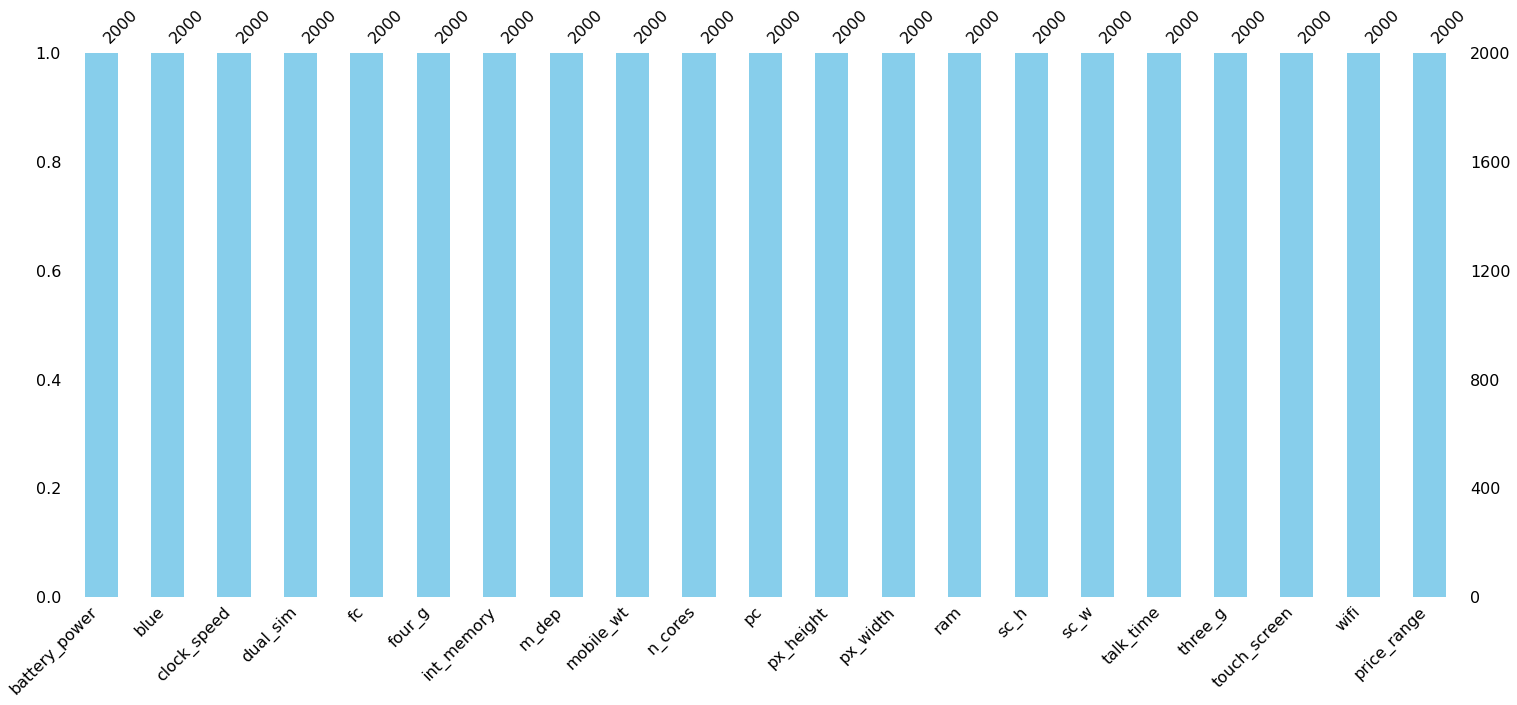

In [10]:
msno.bar(data, color = 'skyblue')

<AxesSubplot:>

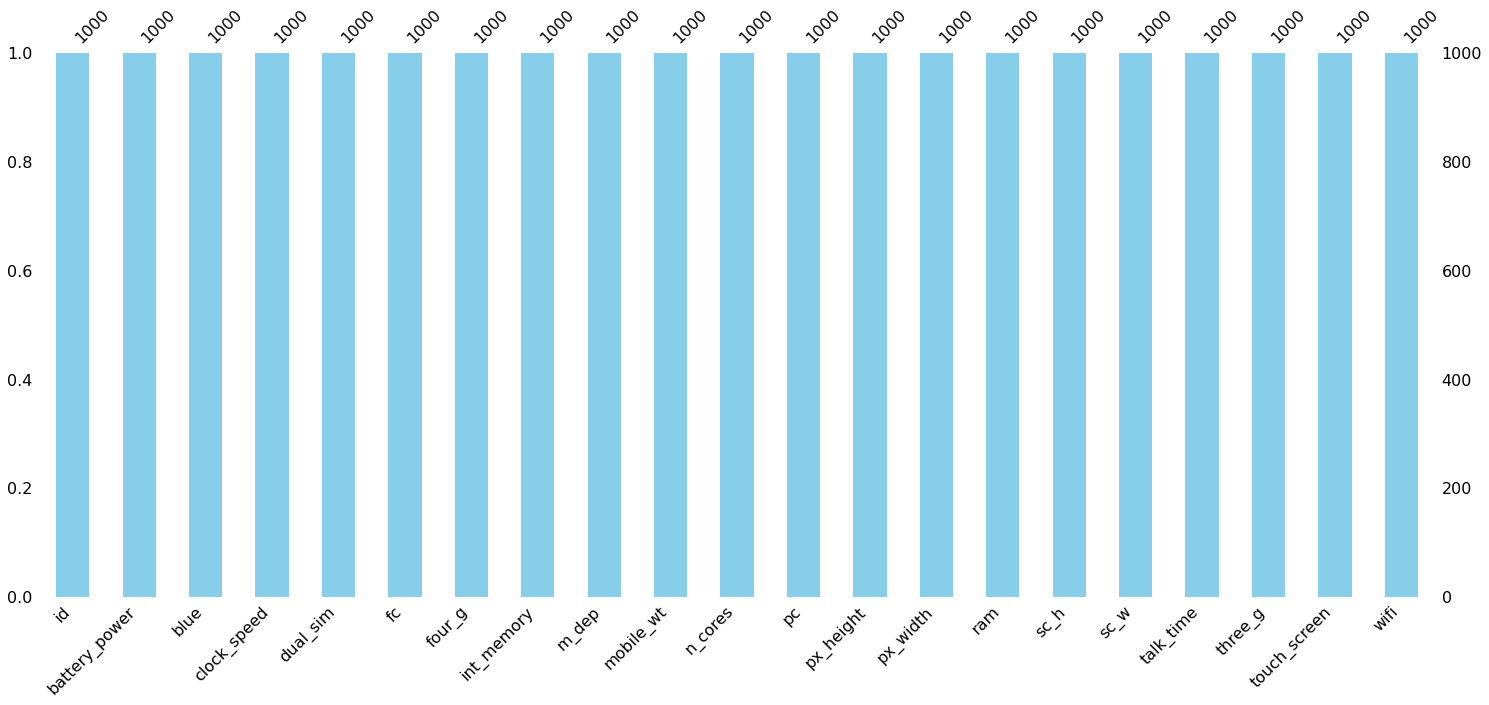

In [11]:
msno.bar(data_test,color='skyblue')

In [12]:
data.duplicated().sum()

0

In [13]:
data_test.duplicated().sum()

0

### Outliers detection using interquartile range

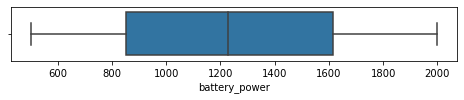

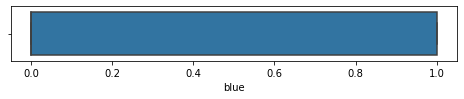

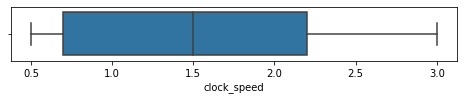

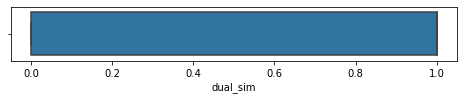

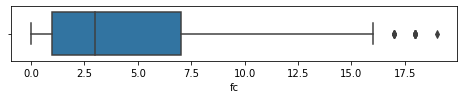

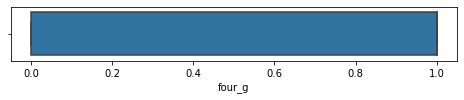

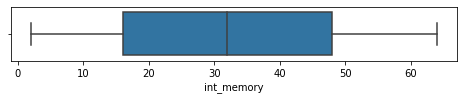

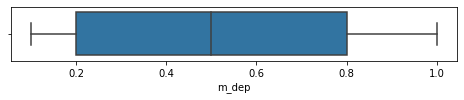

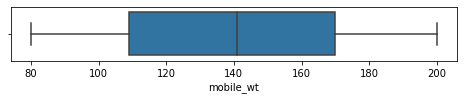

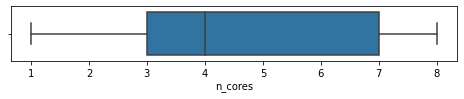

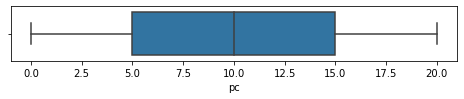

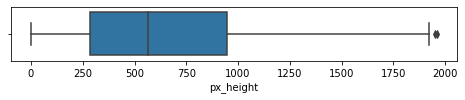

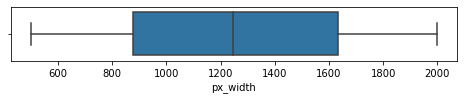

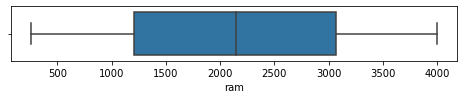

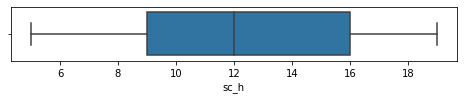

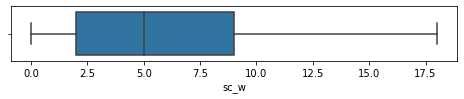

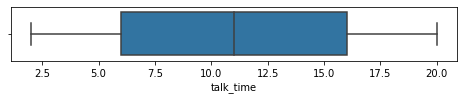

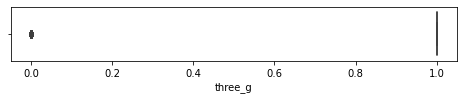

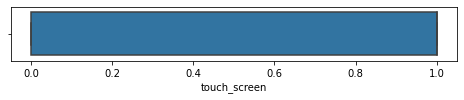

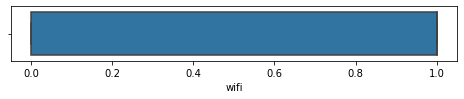

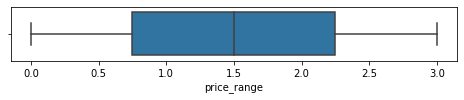

In [14]:
features = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range']
i=0
while i<21:
    plt.figure(figsize=(8,1))
    sns.boxplot(features[i],data=data)
    i+=1

Lets Find outliers

In [15]:
outliers_list=[]
for column in features:
    #1st quartile 25%
    Q1=np.percentile(data[column],25)
    # 3rd quartile (75%)
    Q3 = np.percentile(data[column],75)
    #interquartile range
    iQr=Q3-Q1
    # outlier step
    outliers_step=1.5*iQr
    # Determining a list of indices of outliers
    outliers_list_index=data[(data[column]<Q1-outliers_step) | (data[column]>Q3+outliers_step)].index
            
    # appending the list of outliers 
    outliers_list.extend(outliers_list_index)
    
        

In [16]:
outlier_list = set(outliers_list)
print("Number of Outlies is : ", len(outlier_list),"\n\n")
print("Outlier indexes are : ", outlier_list)

Number of Outlies is :  494 


Outlier indexes are :  {0, 10, 19, 22, 30, 45, 49, 51, 54, 58, 67, 74, 77, 79, 82, 85, 86, 94, 95, 98, 106, 111, 118, 120, 122, 125, 134, 135, 139, 146, 148, 151, 154, 158, 159, 169, 176, 179, 182, 207, 212, 219, 222, 224, 226, 227, 229, 230, 231, 246, 250, 251, 254, 263, 269, 279, 286, 289, 290, 291, 296, 298, 300, 301, 303, 305, 307, 308, 310, 311, 314, 322, 325, 326, 327, 328, 329, 330, 334, 335, 343, 344, 349, 351, 352, 356, 360, 362, 364, 370, 372, 373, 378, 380, 387, 390, 391, 392, 406, 412, 413, 416, 423, 424, 431, 439, 440, 442, 443, 445, 449, 456, 463, 469, 470, 471, 474, 477, 478, 482, 488, 493, 496, 500, 505, 507, 508, 511, 515, 518, 523, 537, 539, 547, 550, 555, 558, 560, 561, 563, 564, 565, 567, 568, 577, 584, 588, 589, 590, 592, 595, 602, 610, 611, 614, 615, 616, 627, 636, 640, 643, 645, 649, 650, 666, 672, 673, 685, 687, 691, 692, 694, 698, 701, 704, 708, 715, 722, 723, 724, 725, 728, 731, 735, 736, 740, 741, 749, 754, 755, 757, 766, 781, 7

# Correlation

In [17]:
corr=data.corr()
corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


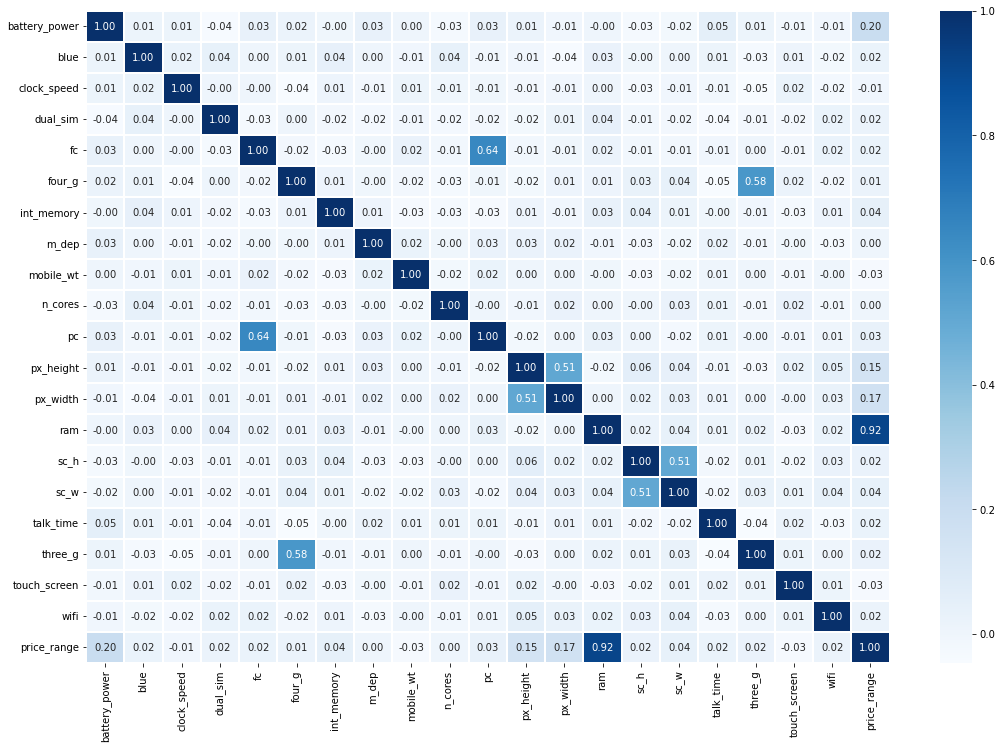

In [18]:
plt.figure(figsize=(18,12))

sns.heatmap(corr,annot=True, cmap='Blues', fmt='.2f', linewidths=0.2)
plt.show()

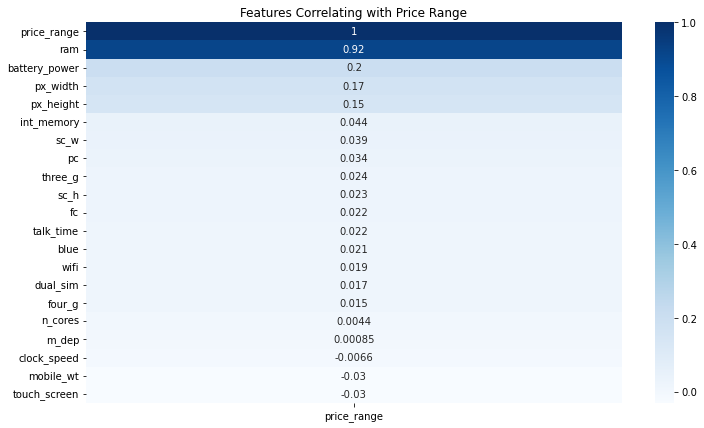

In [19]:
plt.figure (figsize = (12, 7))
heatmap = sns.heatmap (data.corr()[['price_range']].sort_values (by = 'price_range', ascending = False), annot = True,cmap='Blues')
heatmap.set_title ('Features Correlating with Price Range', fontdict = {'fontsize':12});

# Data visualization

### Let's see if the data is balanced or not

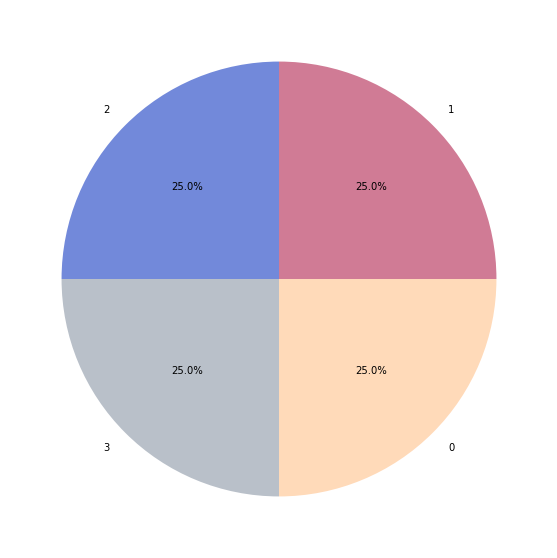

In [20]:
s = data["price_range"].value_counts()

plt.figure(figsize=(10,10))
plt.pie(s, labels = s.index, autopct='%1.1f%%',colors=['#d07b95','#7289da',"#B9C0C9","peachpuff"])
plt.show()

## Cheching the distributions of train and test data

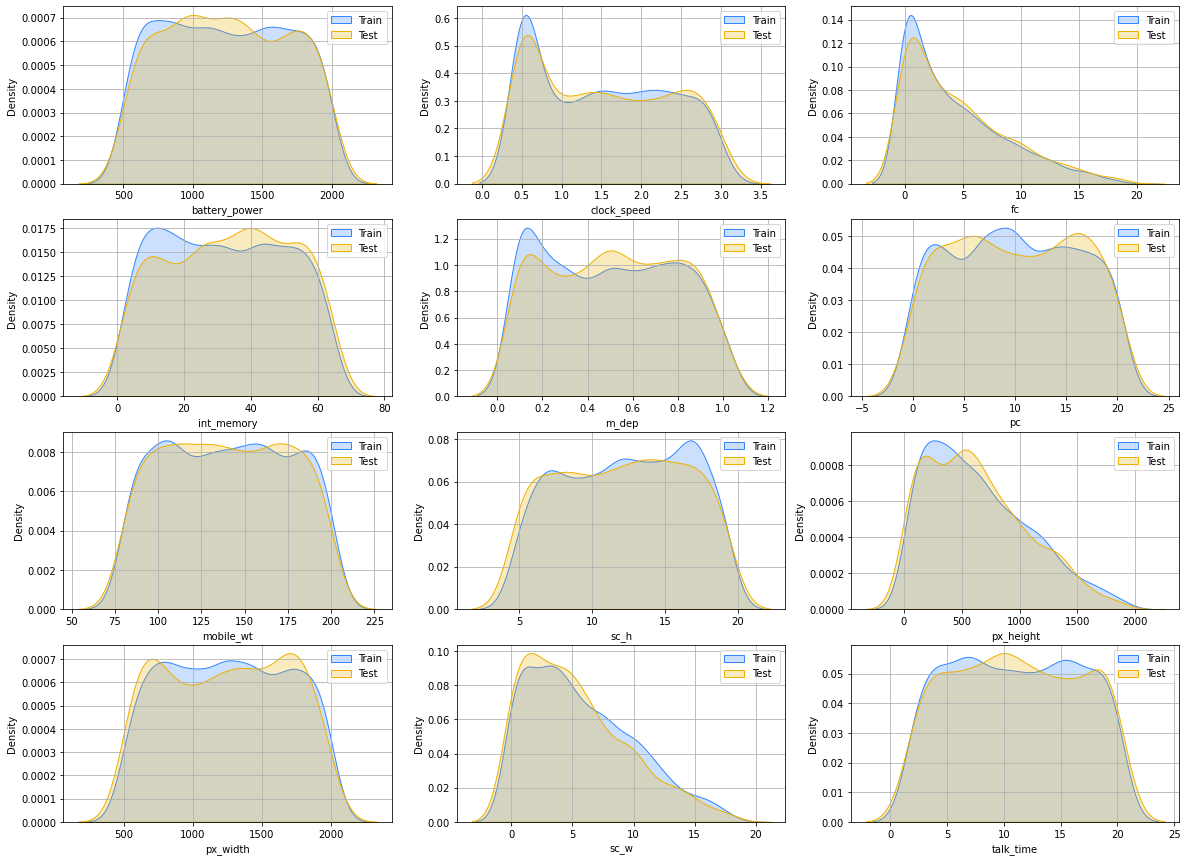

In [21]:
names = ['battery_power', 'clock_speed','fc','int_memory','m_dep','pc','mobile_wt','sc_h','px_height','px_width','sc_w','talk_time']
fig=plt.figure(figsize=(20,15))
for ind,col in enumerate(names):
    ax=fig.add_subplot(4,3,ind+1)
    ax.grid()
    sns.kdeplot(x=col,fill=True,color="#3386FF",data=data,label='Train')
    sns.kdeplot(x=col,fill=True,color="#EFB000",data=data_test,label='Test')
    ax.set_xlabel(col)
    ax.legend()
fig.show()
    

### visualization categorical variable

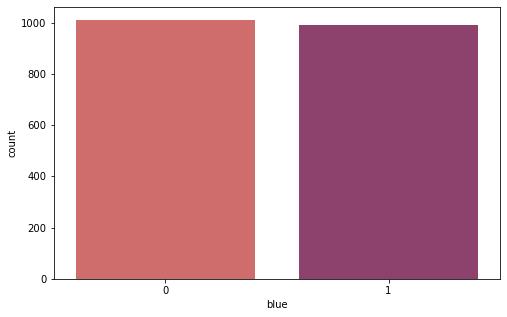

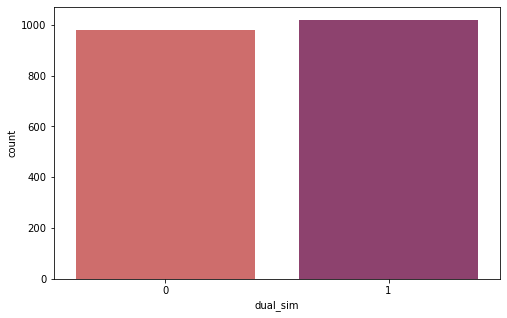

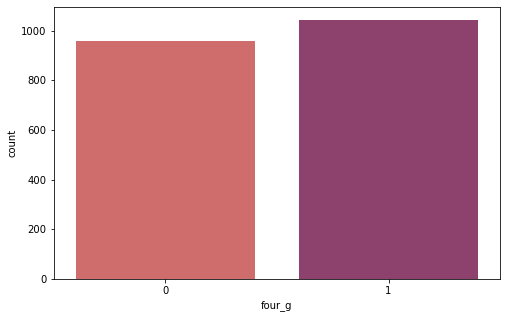

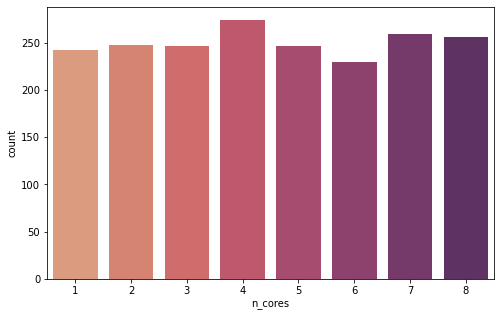

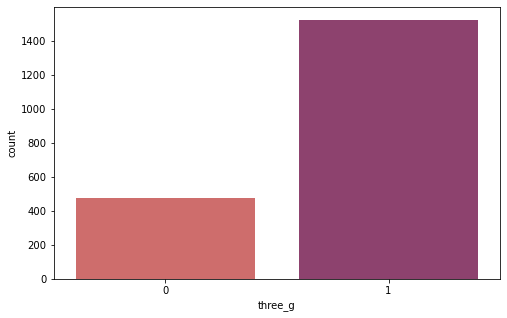

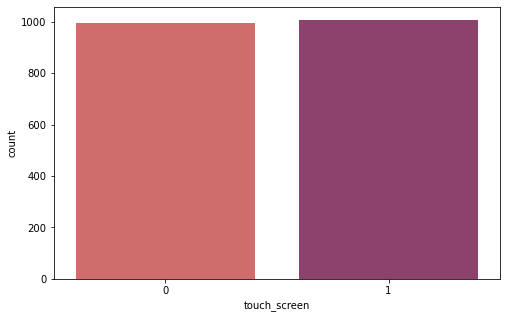

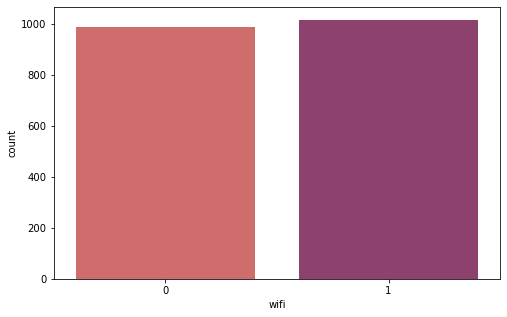

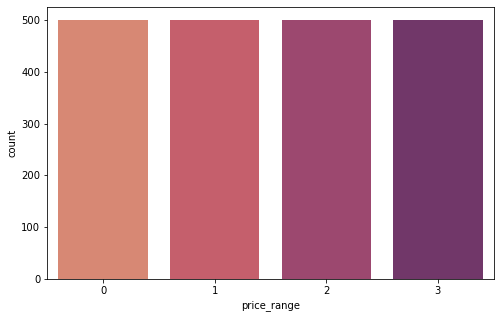

In [22]:
categorical = ['blue','dual_sim','four_g','n_cores','three_g','touch_screen','wifi','price_range']
for i in categorical:
    plt.figure(figsize=(8,5))
    sns.countplot(data[i], palette = "flare")

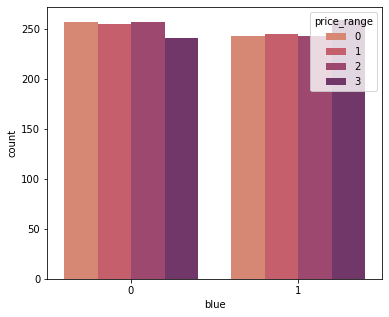

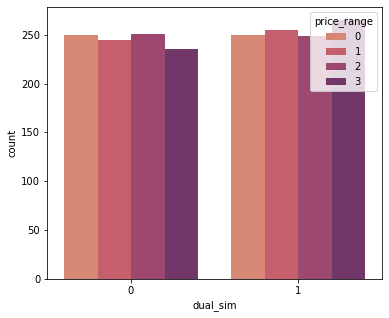

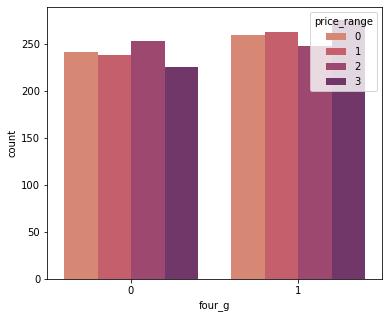

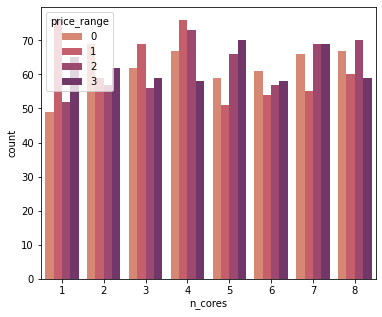

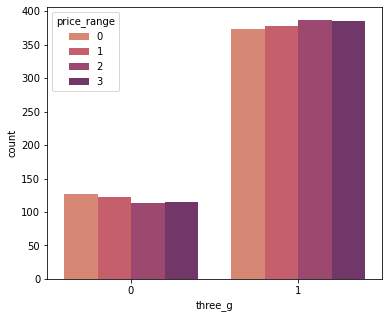

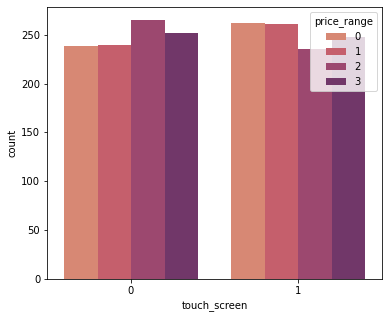

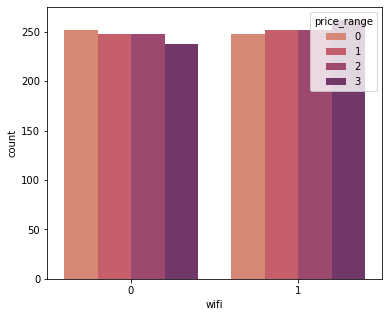

In [23]:
list=["blue","dual_sim","four_g","n_cores","three_g","touch_screen","wifi"]
for i in list:
    plt.figure(figsize=(6,5))
    sns.countplot(data[i], palette = "flare",hue=data['price_range'])

### visualization of numeric values

In [24]:
numerical = ["battery_power","clock_speed","fc","int_memory","m_dep","mobile_wt","pc","px_height","px_width","ram","sc_h","sc_w","talk_time"]

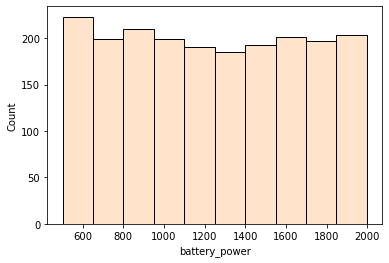

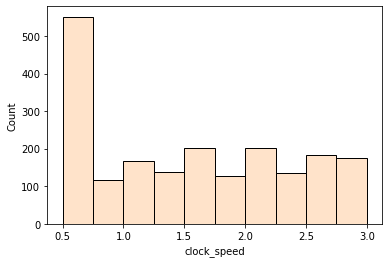

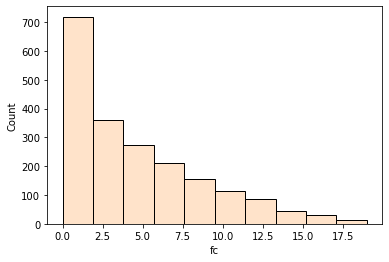

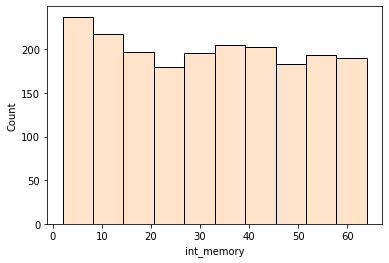

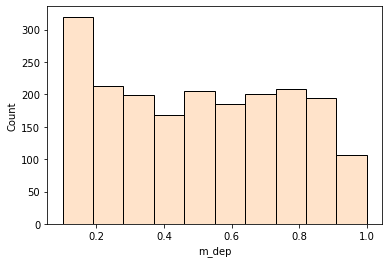

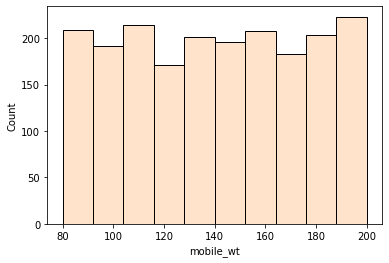

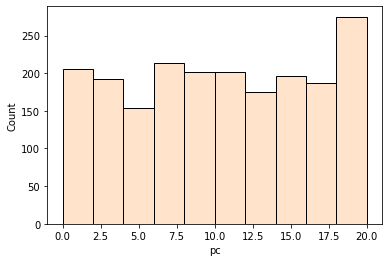

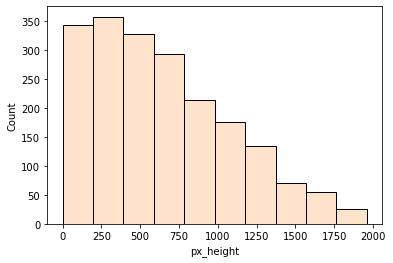

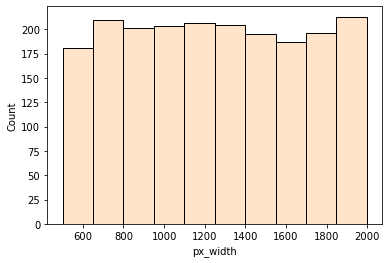

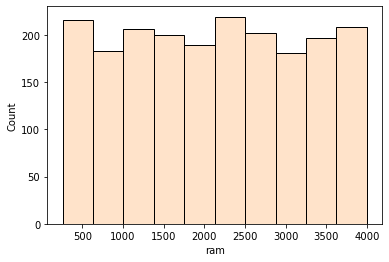

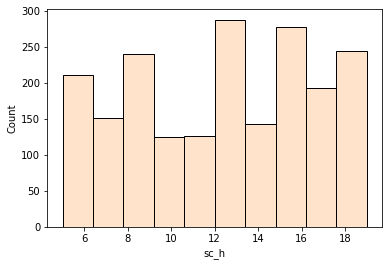

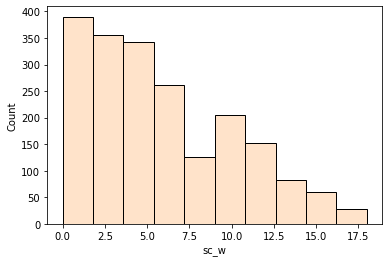

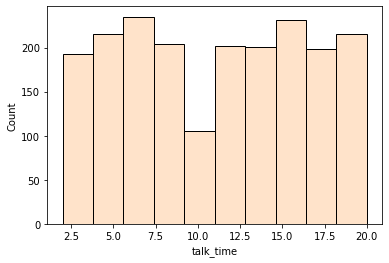

In [25]:
def create_histplot(x,data):
     sns.histplot(x=x, data=data,color="peachpuff",bins=10)
     plt.show()
for feature in numerical:
    create_histplot(feature,data)

### Density plot

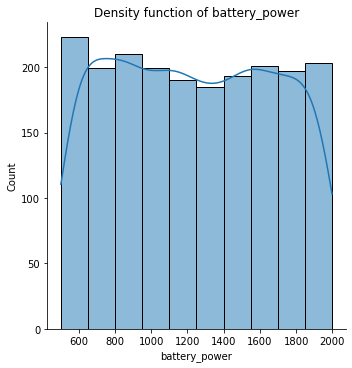

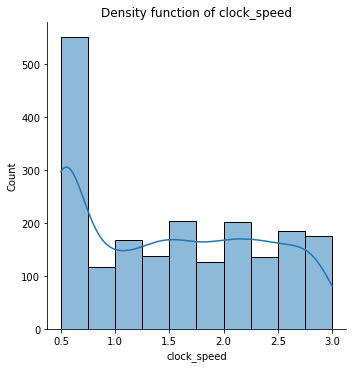

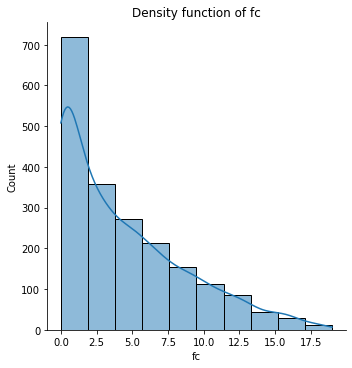

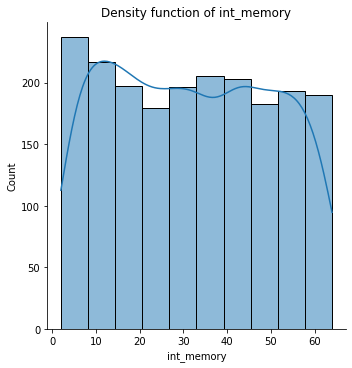

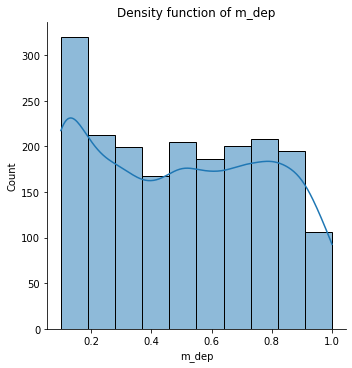

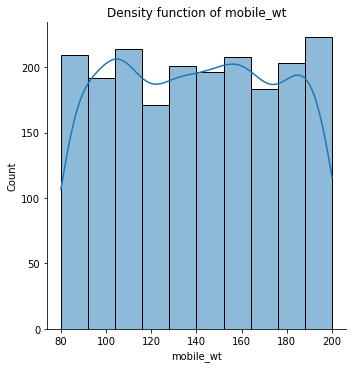

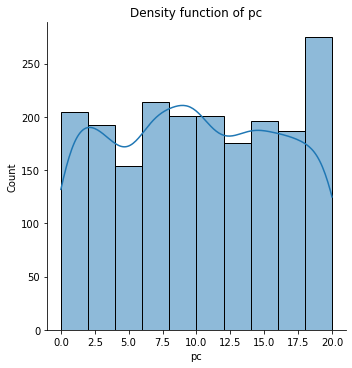

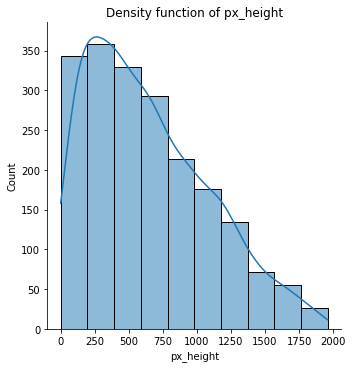

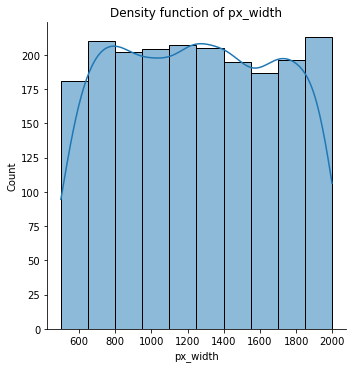

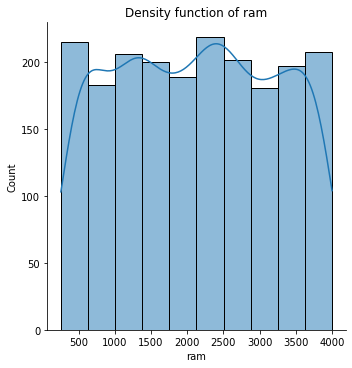

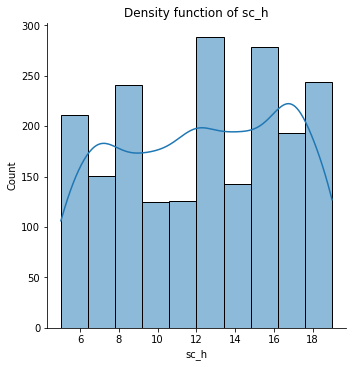

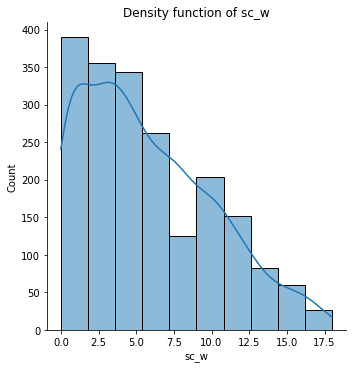

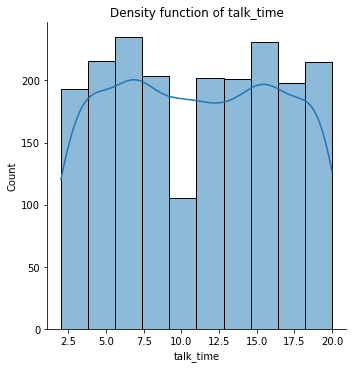

In [26]:
def dist_plot(x,data):
    sns.displot(data[x],bins=10, palette='viridis',kde=True).set(title=(f"Density function of {x}"))
    plt.show()
    
for feature in numerical:
    dist_plot(x=feature,data=data)

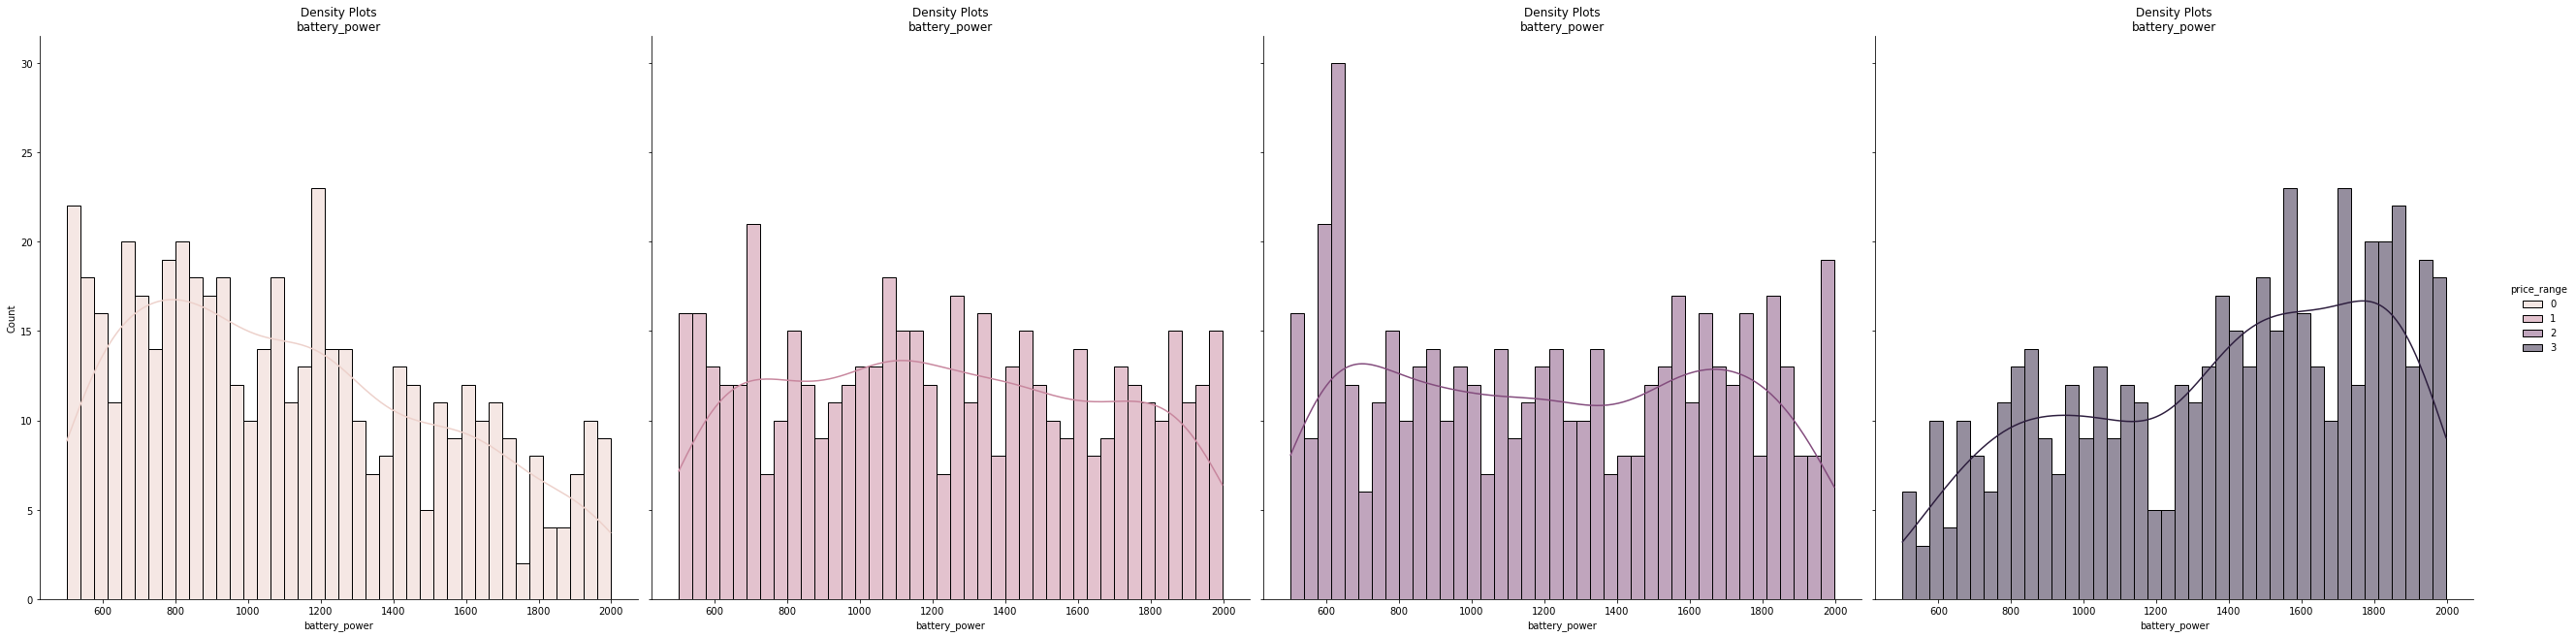

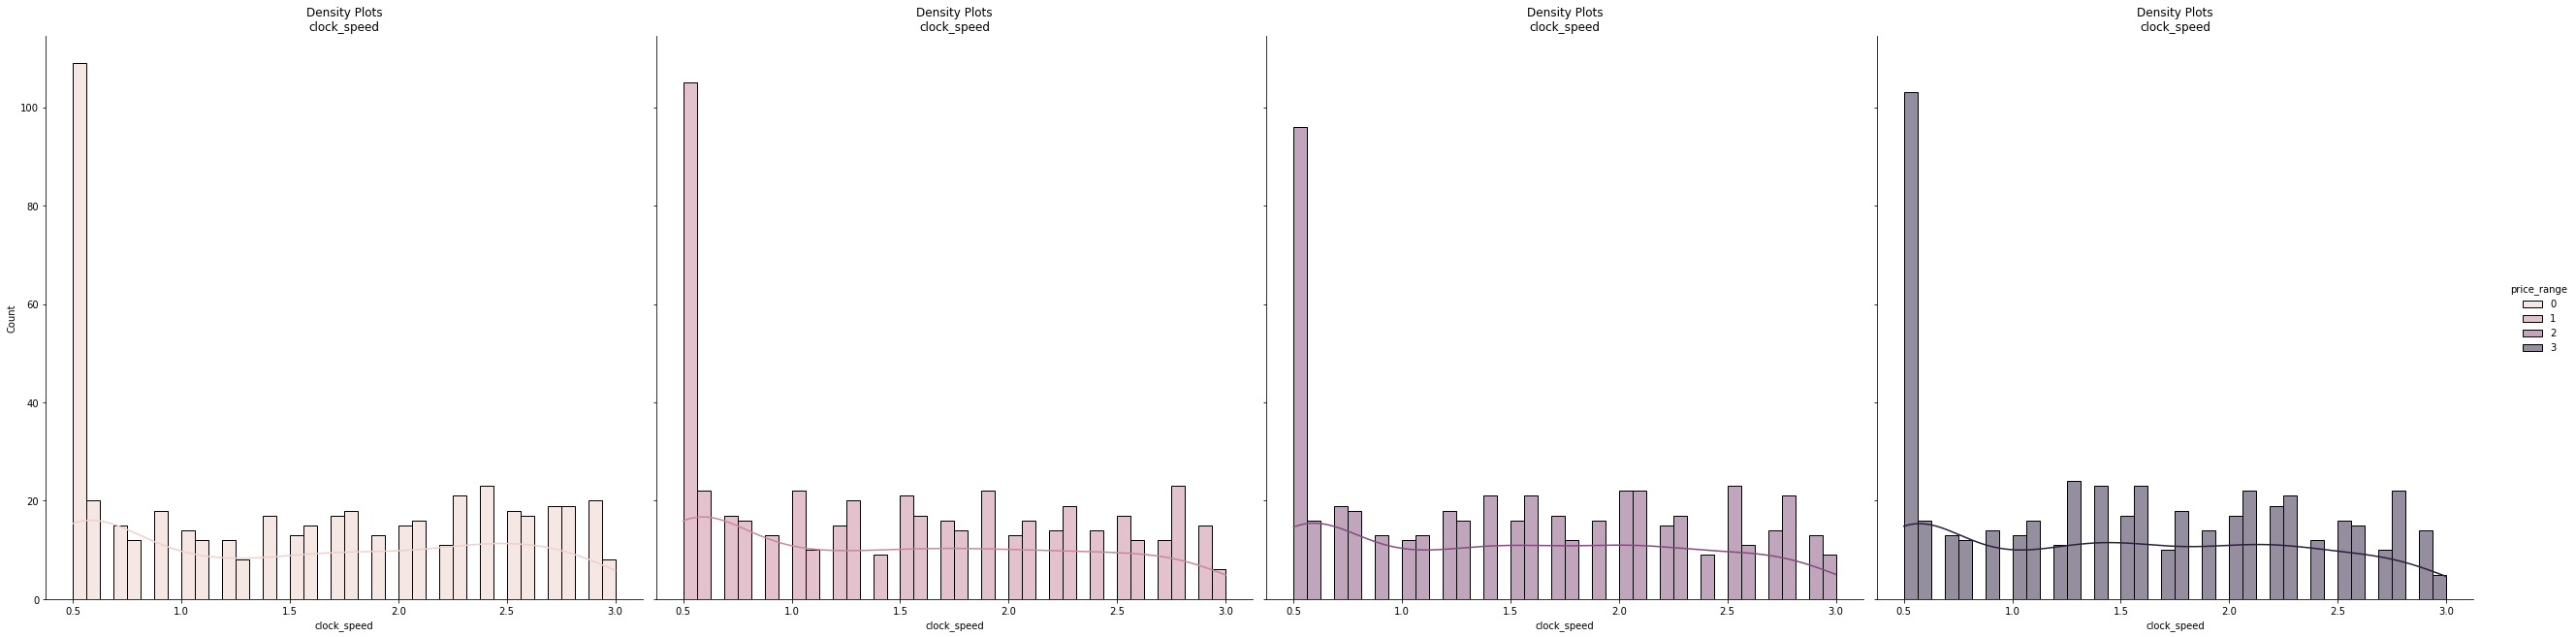

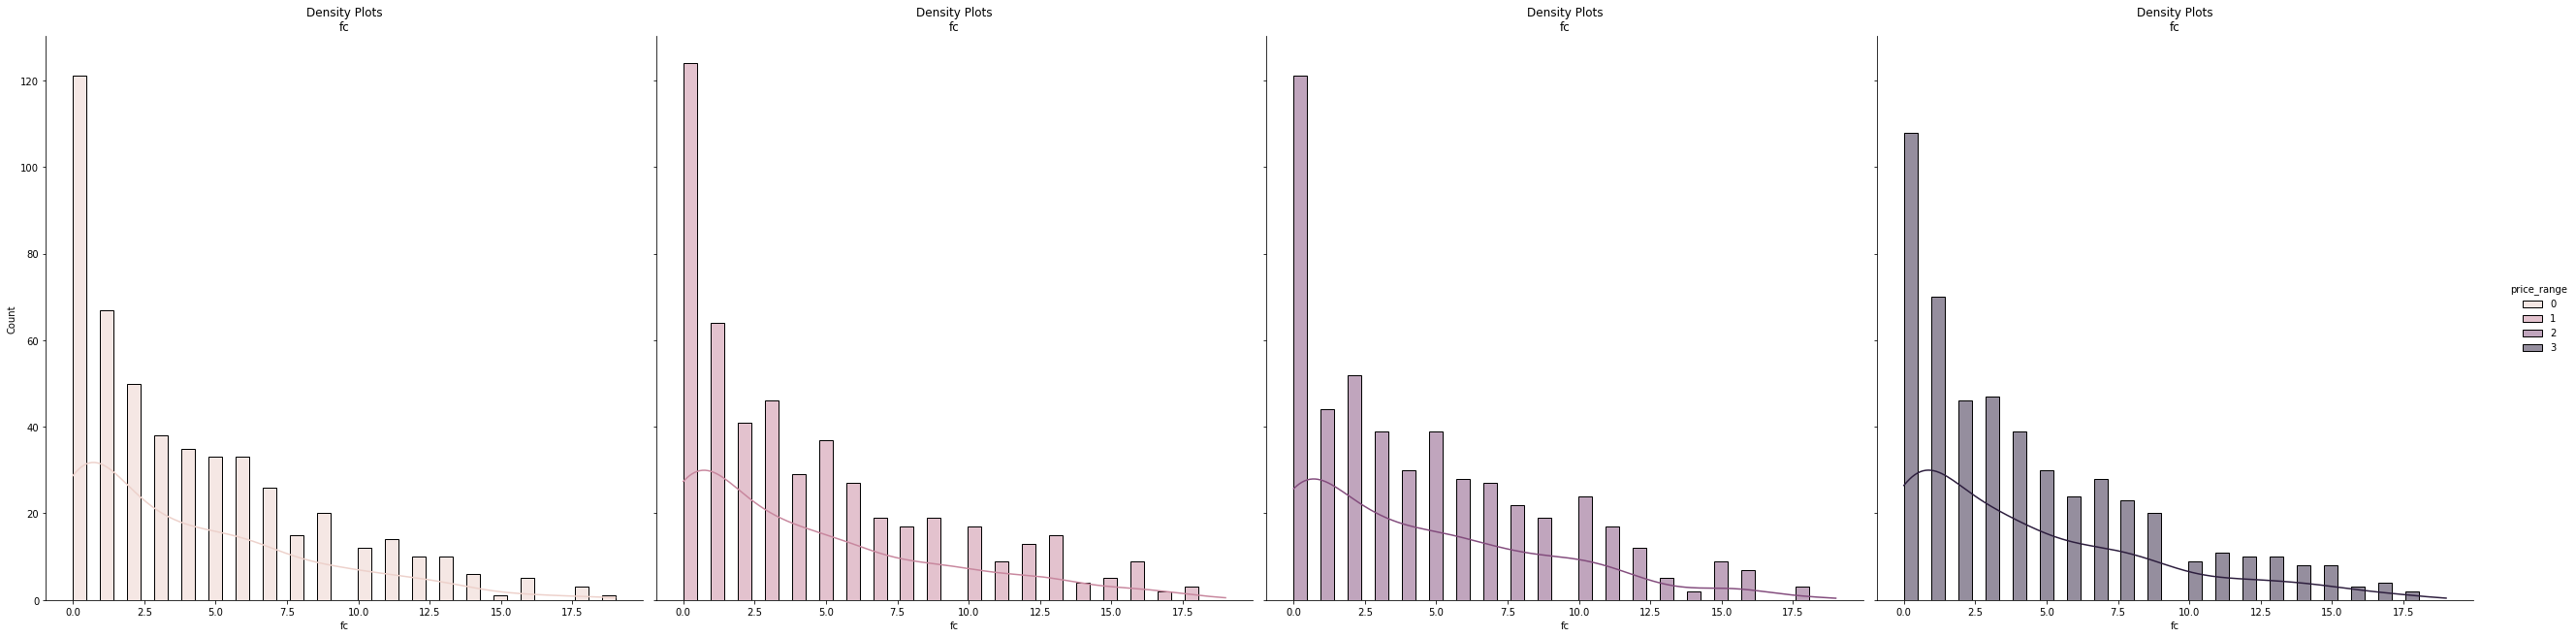

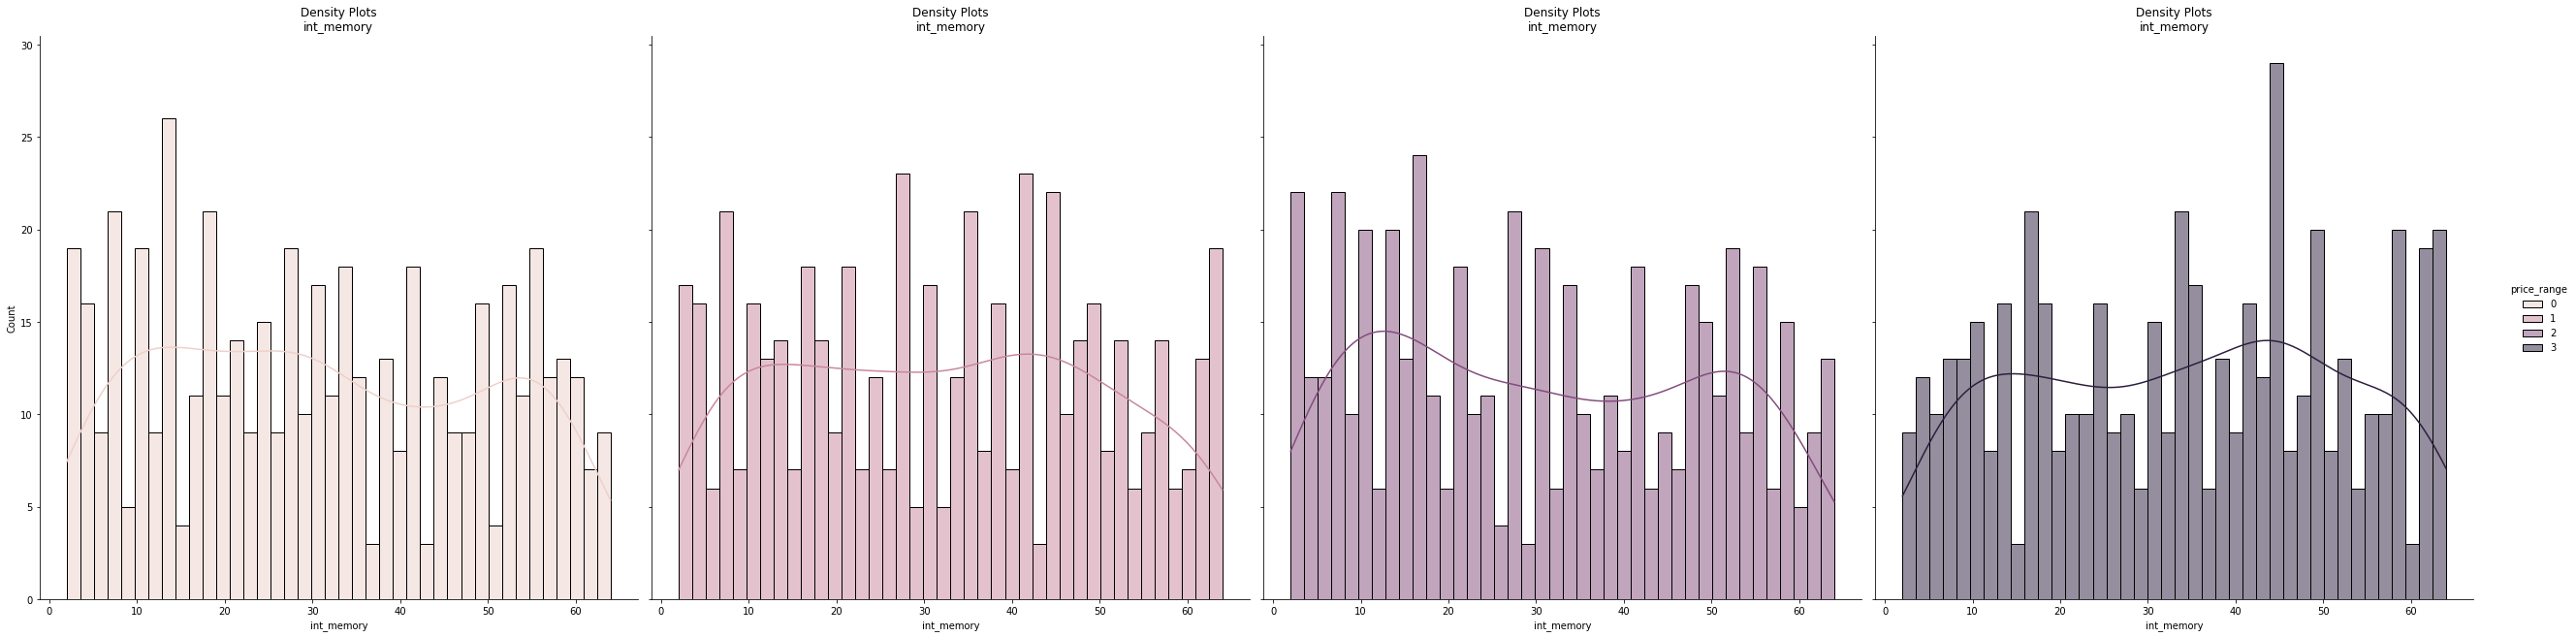

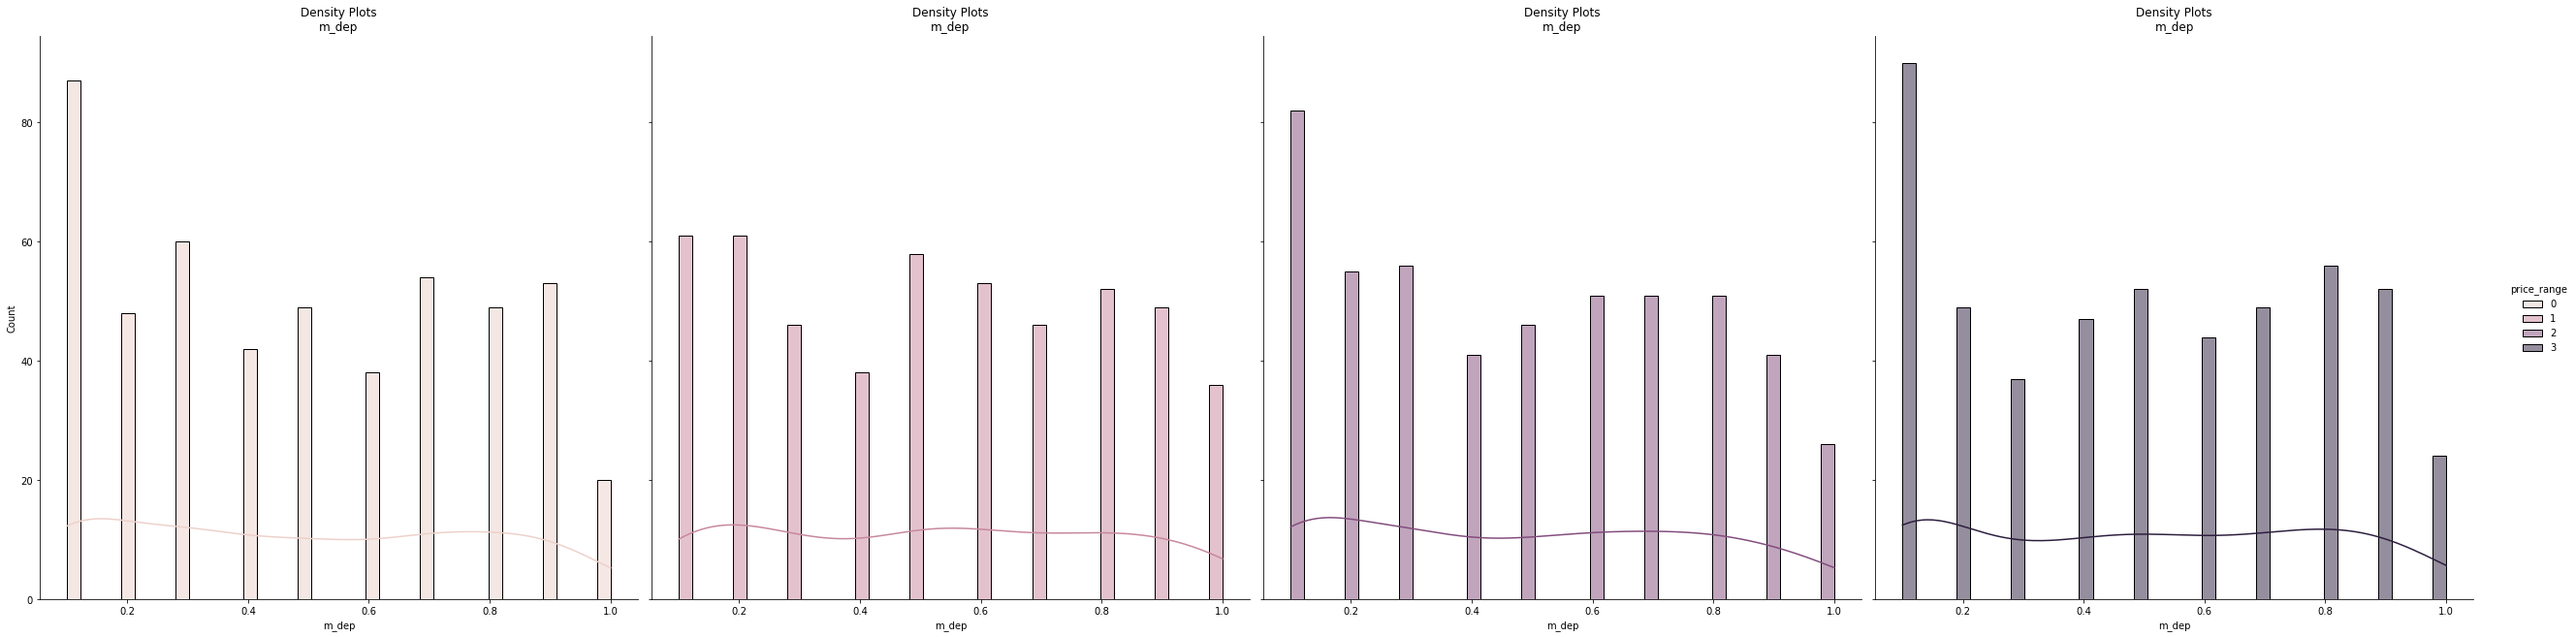

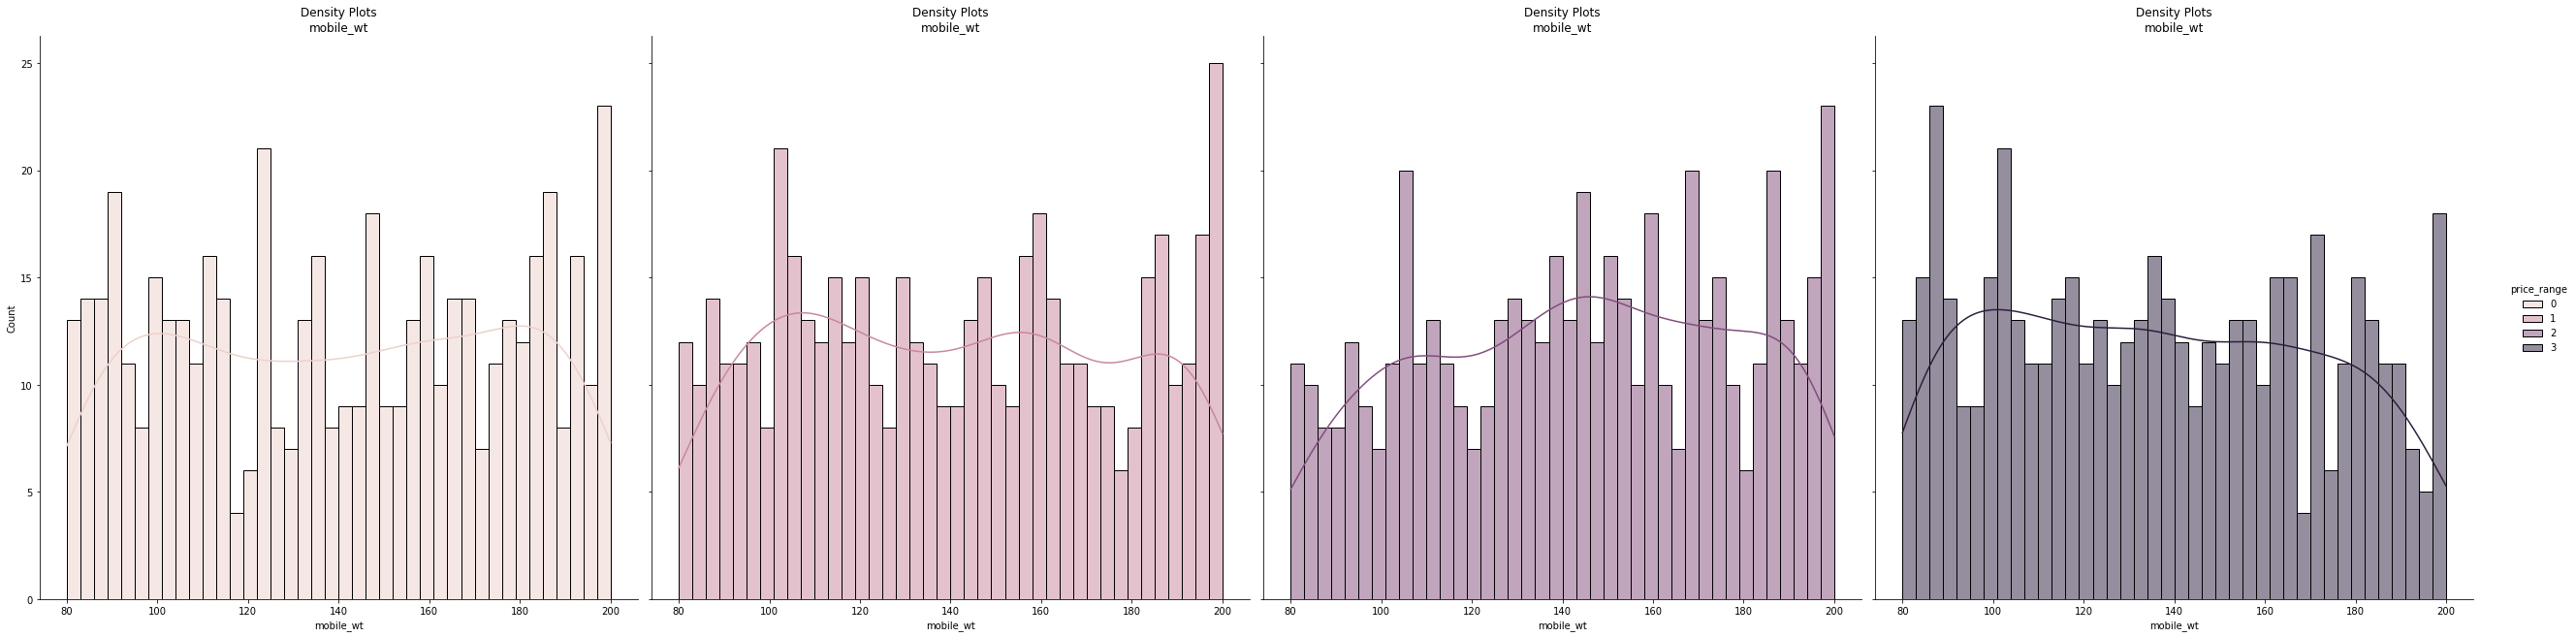

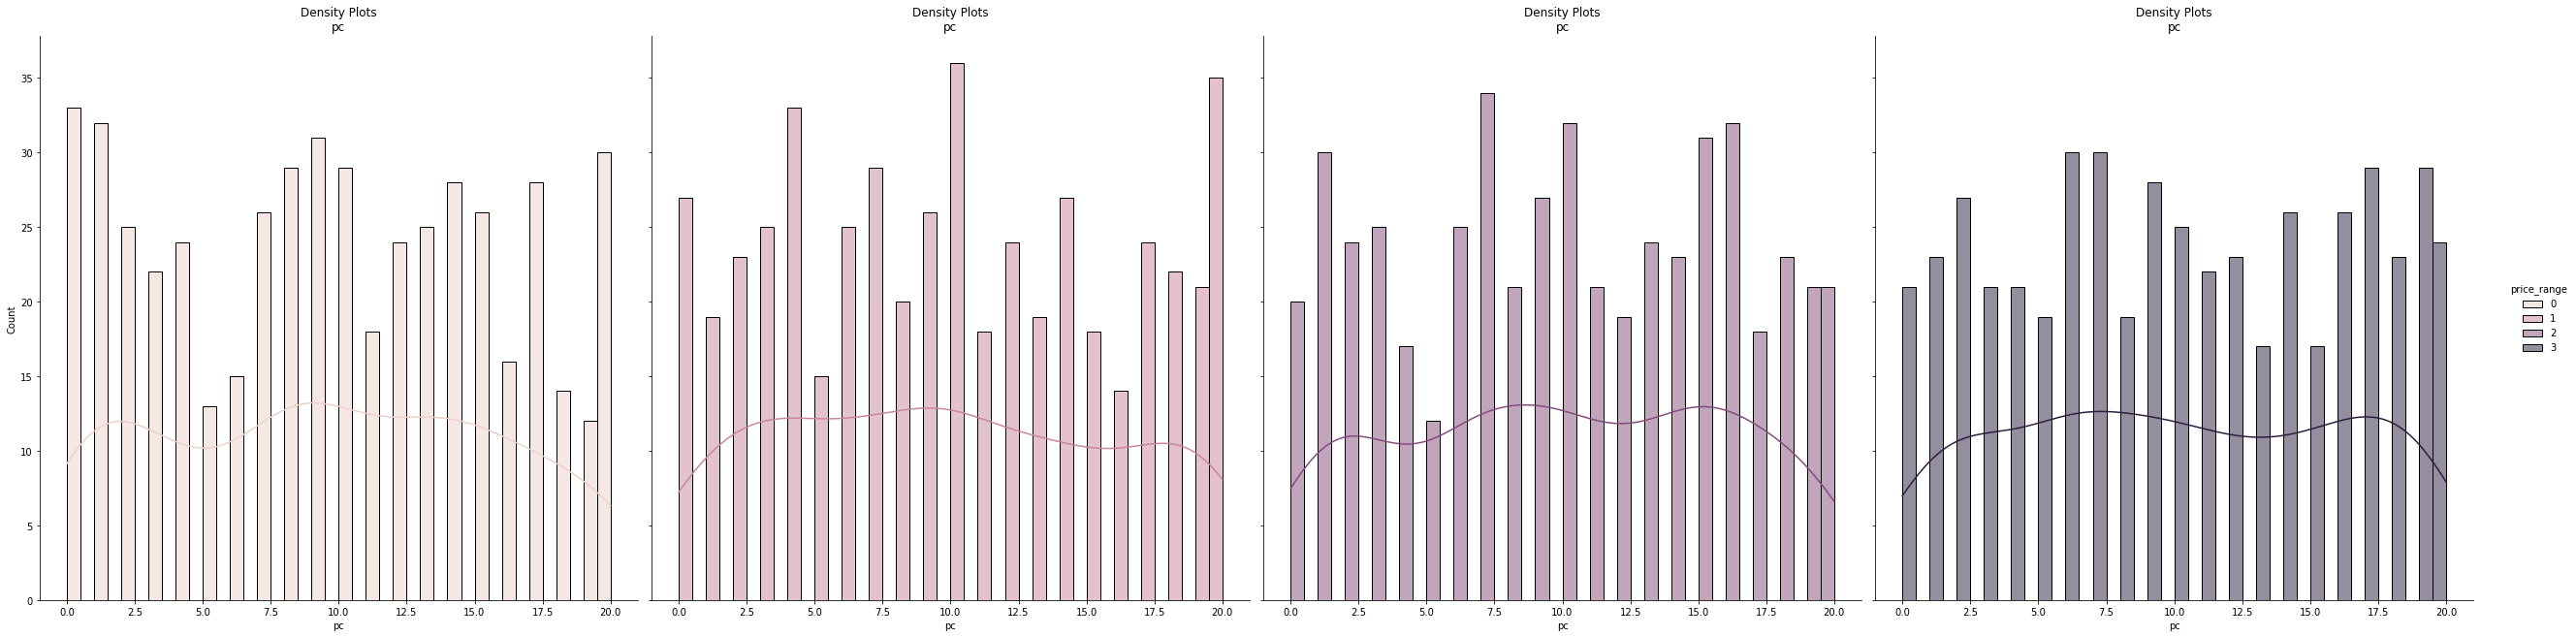

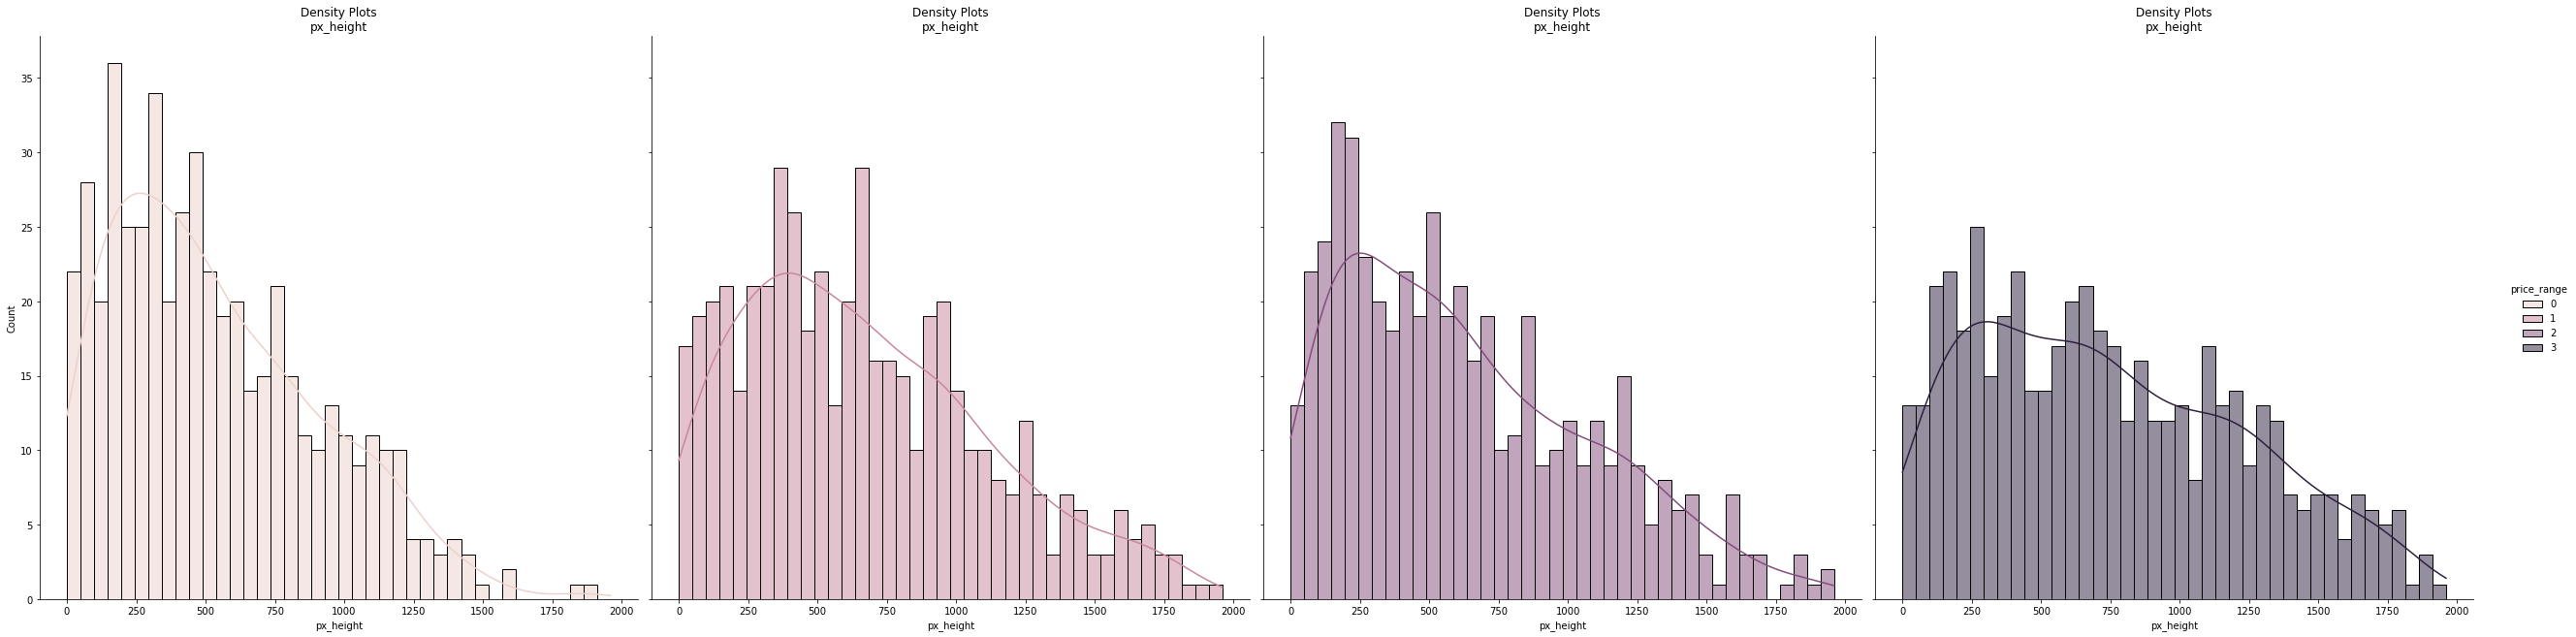

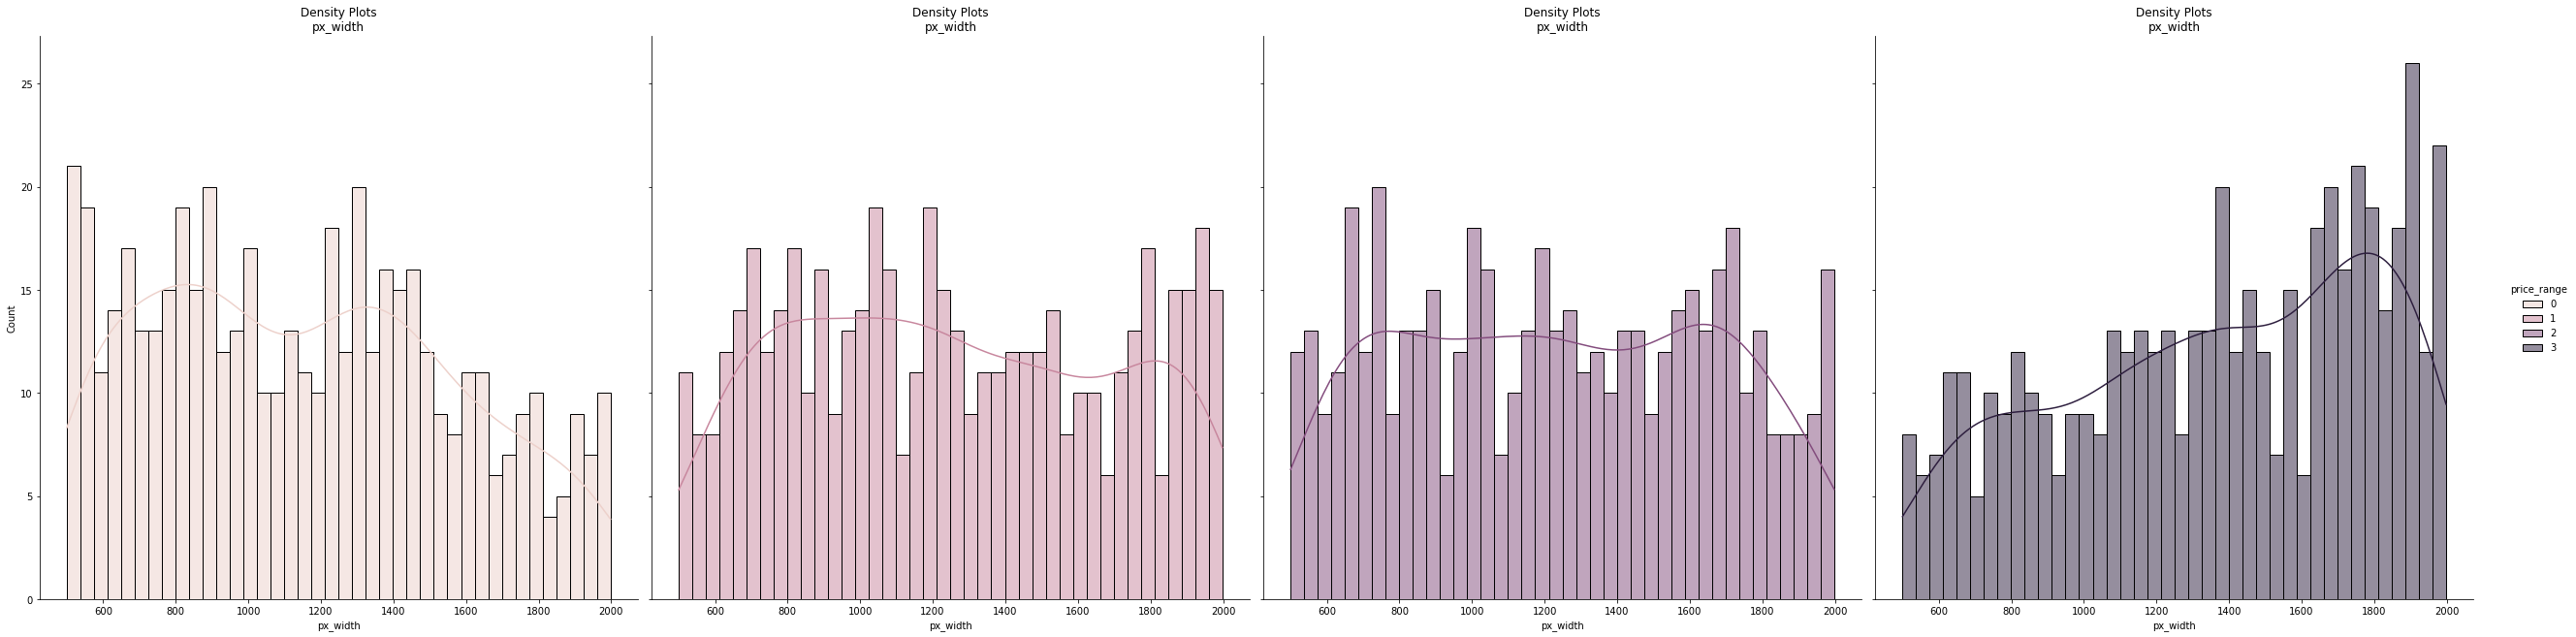

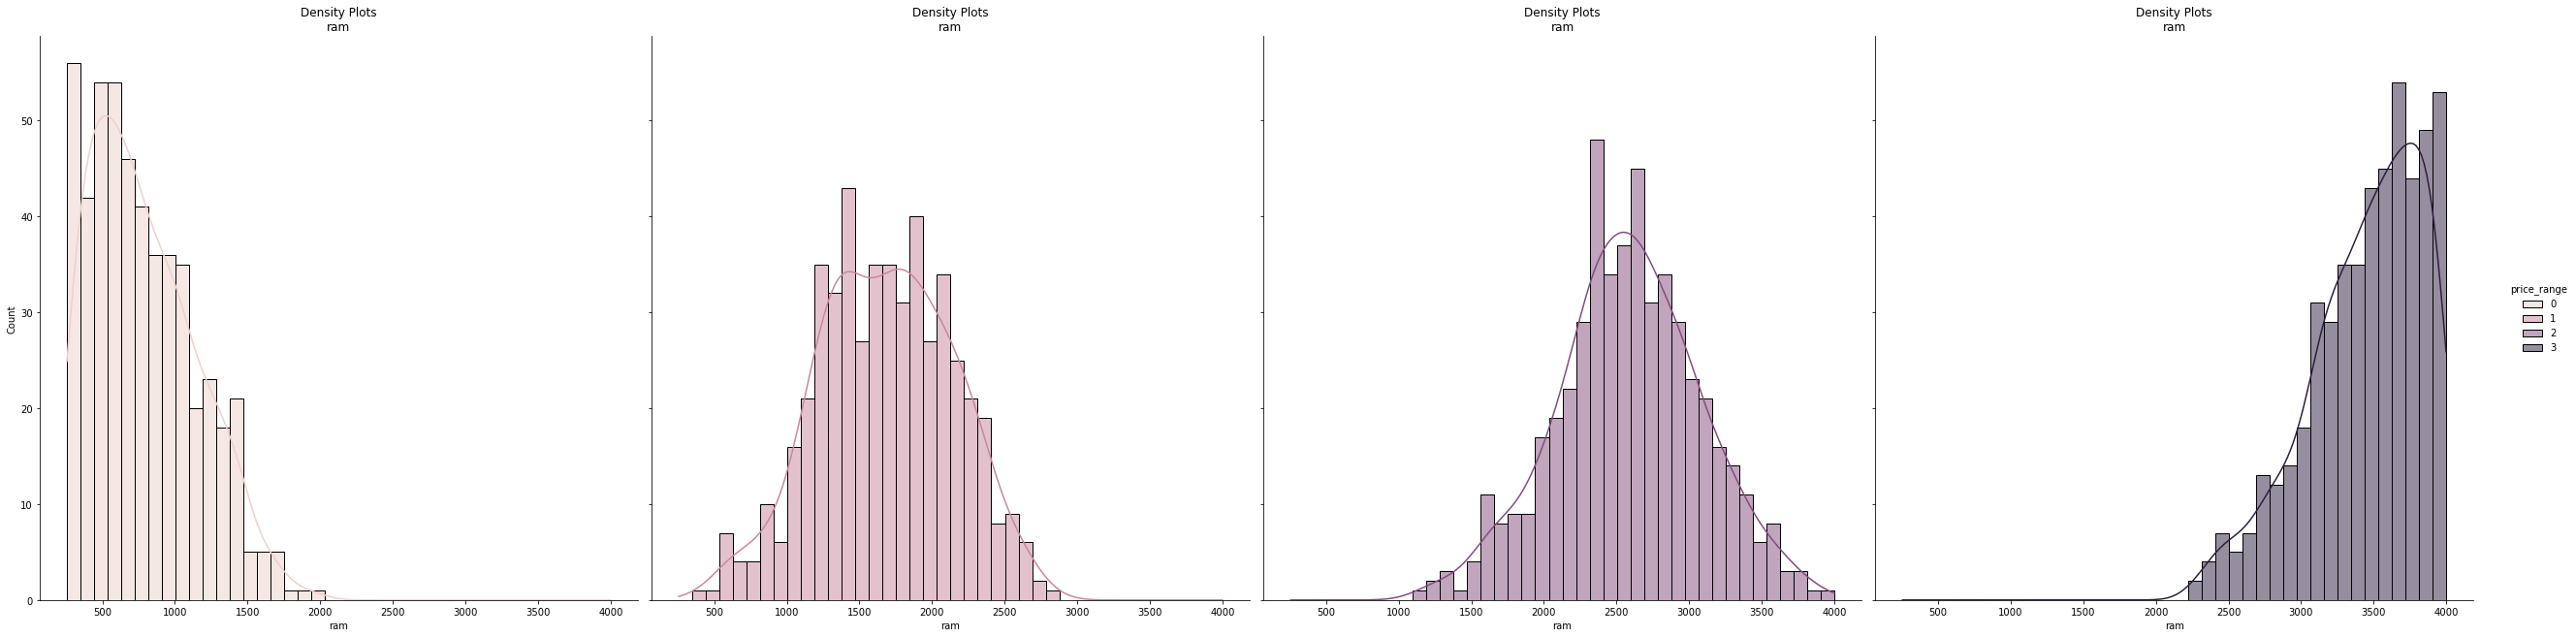

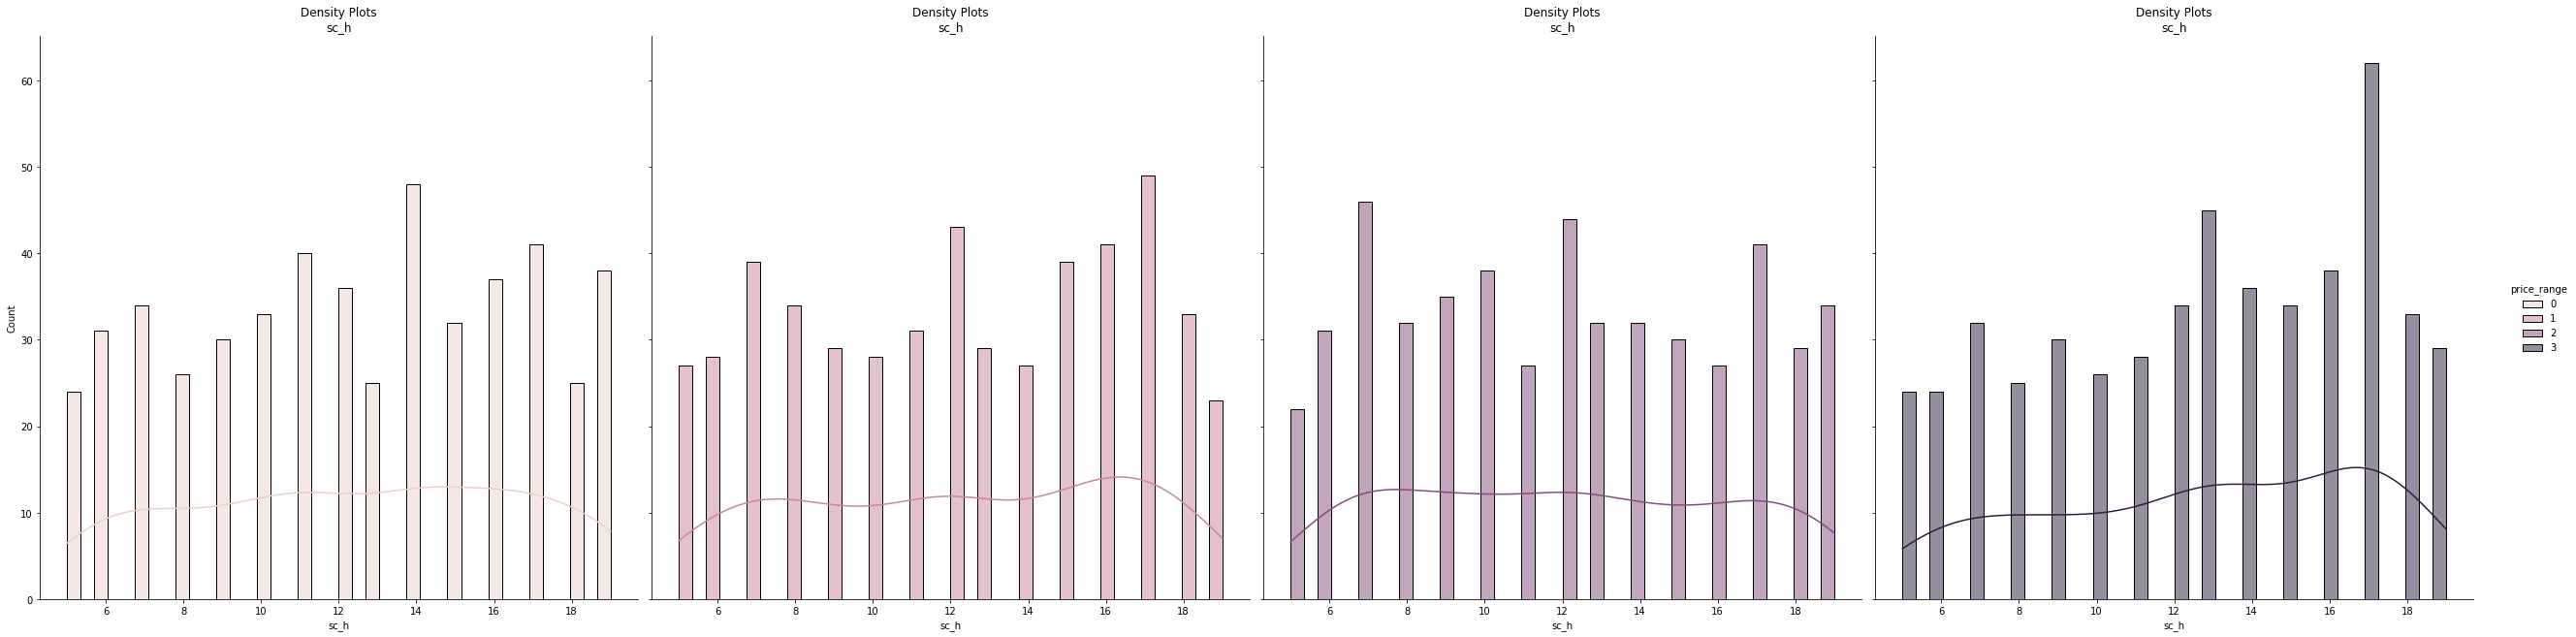

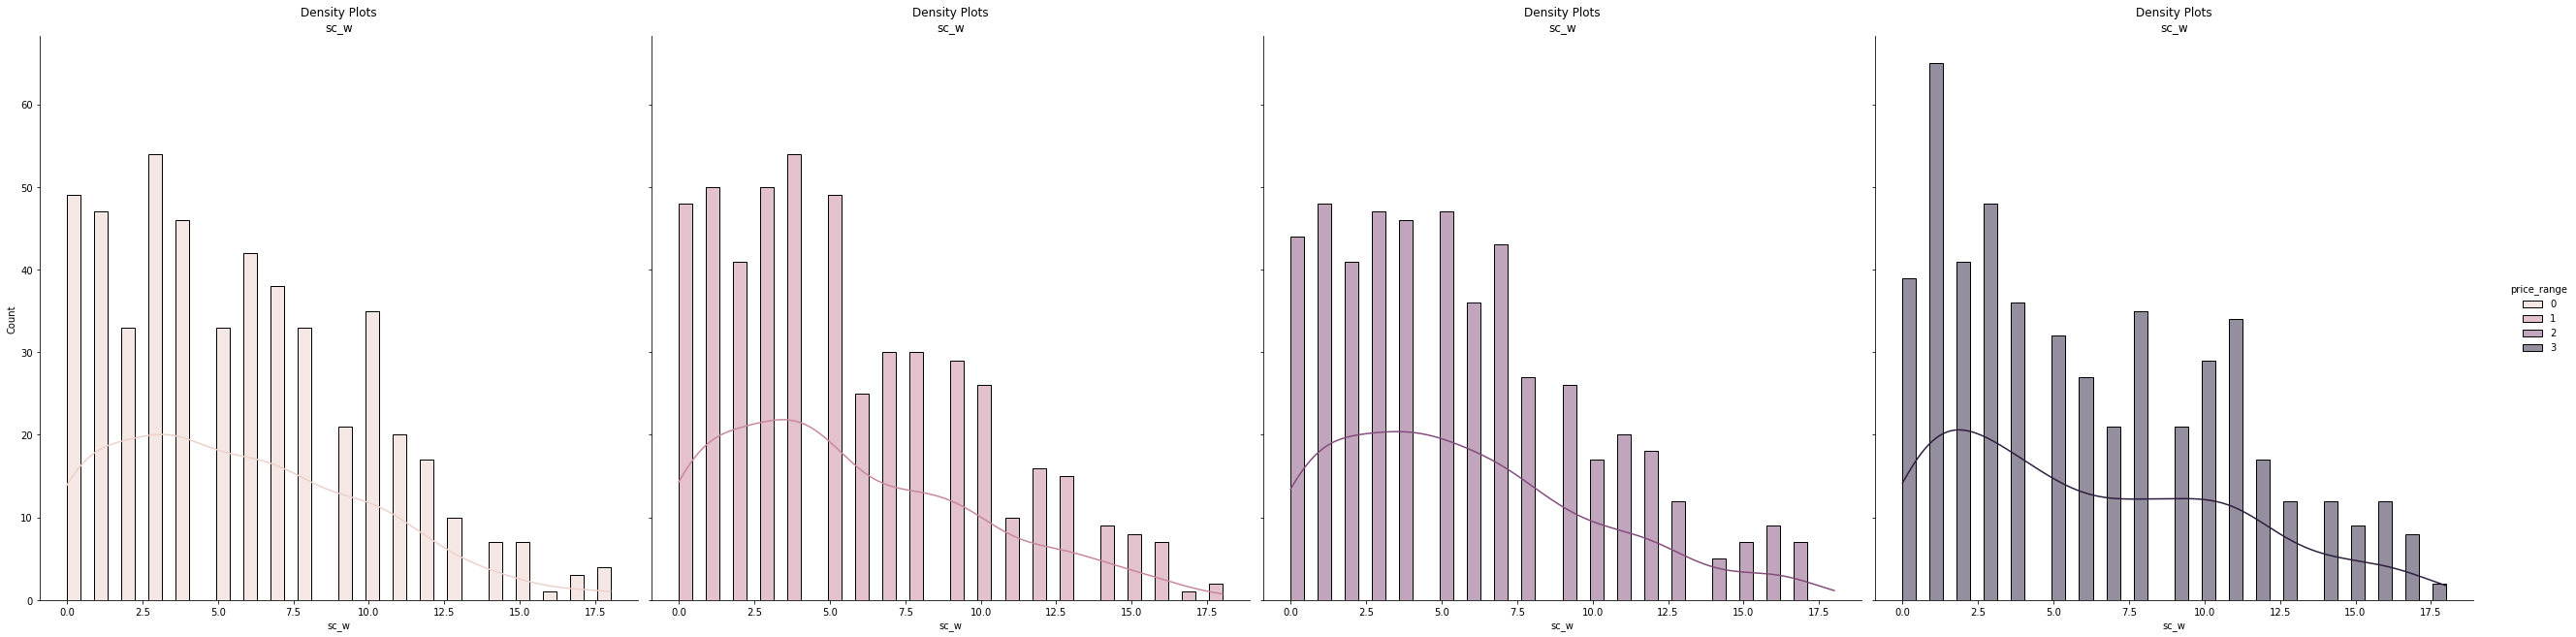

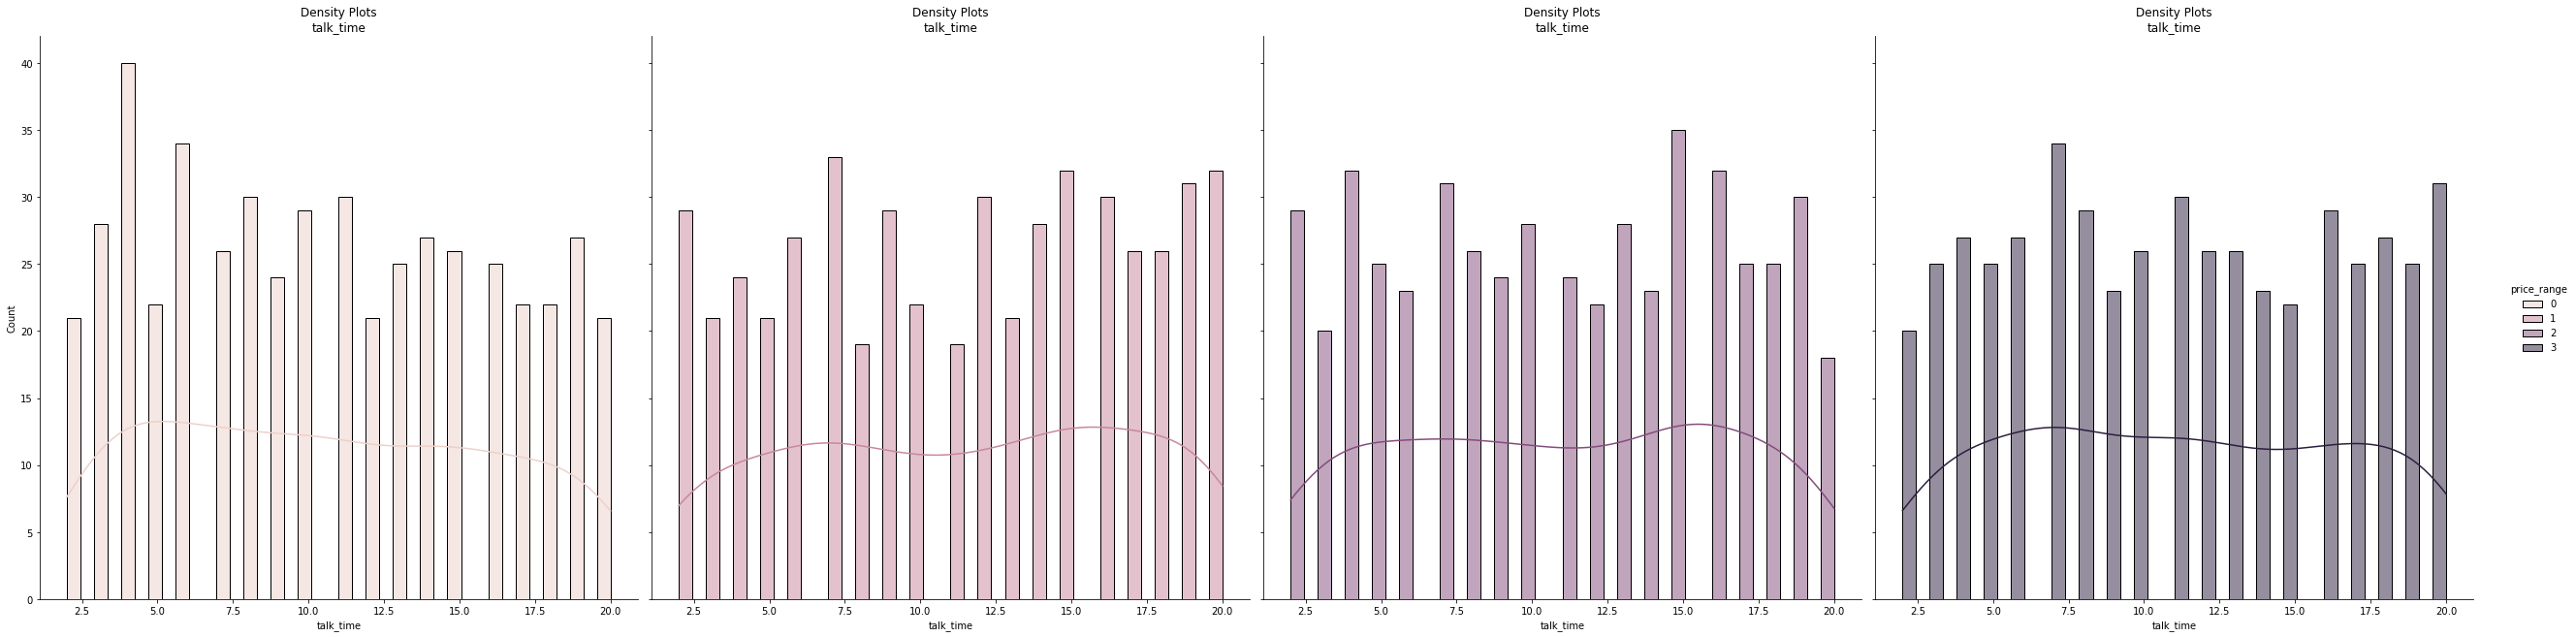

In [27]:
def displot_hue(data,x):
    sns.displot(data=data,x=x,hue="price_range",kde=True,bins=40,col="price_range",height=9).set(title=(f"Density Plots\n{x}"))

    

for feature in numerical:
    displot_hue(data=data, x=feature)

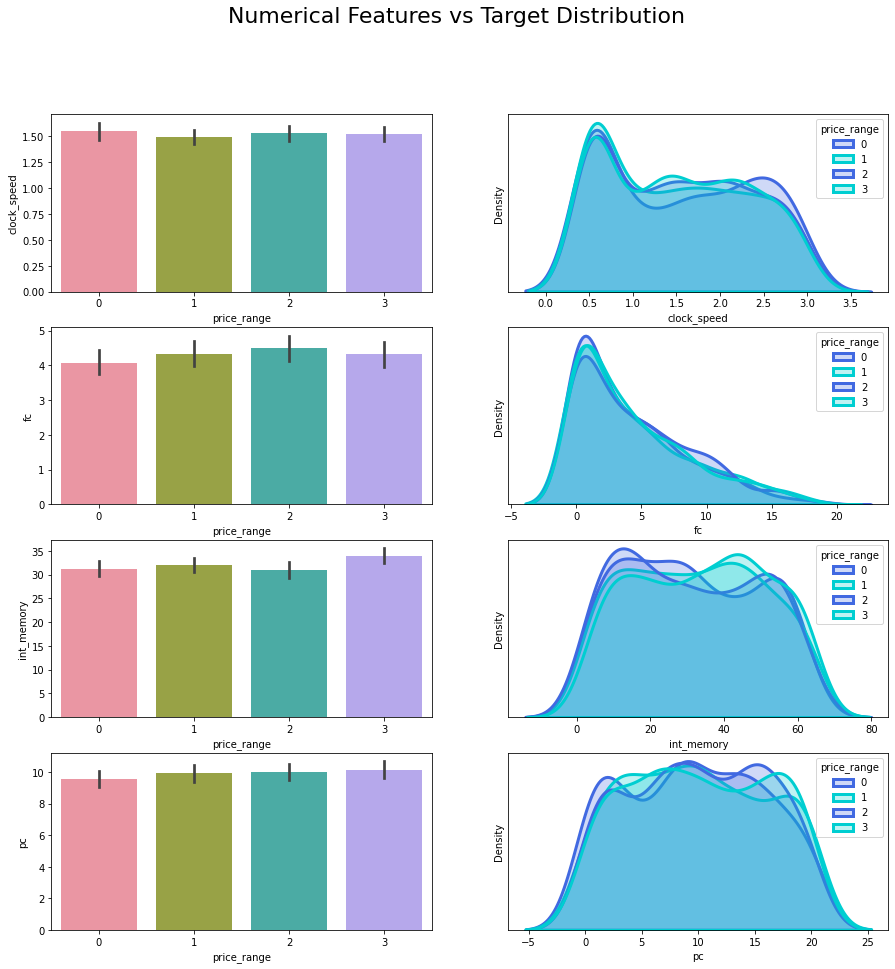

In [28]:
names = ['clock_speed','fc','int_memory','pc']
sns.set_palette(['royalblue', 'darkturquoise'])
fig,ax=plt.subplots(4, 2, figsize=(15,15))

for i,col in enumerate(names):
    sns.barplot(x='price_range',y=col,data=data,ax=ax[i,0])
    sns.kdeplot(data=data[data['price_range']==0],x=col,fill=True,linewidth=3, ax=ax[i,1], label='0')
    sns.kdeplot(data=data[data['price_range']==1],x=col,fill=True,linewidth=3, ax=ax[i,1], label='1')
    sns.kdeplot(data=data[data['price_range']==2],x=col,fill=True,linewidth=3, ax=ax[i,1], label='2')
    sns.kdeplot(data=data[data['price_range']==3],x=col,fill=True,linewidth=3, ax=ax[i,1], label='3')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='price_range', loc='upper right')
    
plt.suptitle('Numerical Features vs Target Distribution', fontsize=22)
# plt.tight_layout()                     
plt.show()

# Model

### I am going to use 2 different algorithms on this dataset. 



1. Random Forest(RF)

2. Support Vector Machine(SVM)

## Random Forest

In [29]:
x=data.drop('price_range',axis=1)
y=data['price_range']

### choosing hyperparameter

In [30]:
def Rf_best(x, y, test_size, max_depth,n_estimators):
    eval_df=pd.DataFrame()
    for xx in test_size:
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=xx,random_state=10)
        for max_d in max_depth:
            for n_estim in n_estimators:
                model=RandomForestClassifier(max_depth=max_d,n_estimators=n_estim)
                model.fit(x_train,y_train)
                y_pred=model.predict(x_test)
                dict={"Test_size":xx, "Max_depth":max_d, "n_estimator":n_estim ,"Accuracy":accuracy_score(y_test, y_pred), "Score":model.score(x_test,y_test)}
                eval_df=eval_df.append(dict,ignore_index=True)
    return(eval_df)
evaluation_df=Rf_best(x,y,[.1,.15,.2,.25,.3],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],[10,20,100,200])

In [31]:
evaluation_df

,Test_size,Max_depth,n_estimator,Accuracy,Score
0,0.1,1.0,10.0,0.485000,0.485000
1,0.1,1.0,20.0,0.610000,0.610000
2,0.1,1.0,100.0,0.590000,0.590000
3,0.1,1.0,200.0,0.580000,0.580000
4,0.1,2.0,10.0,0.760000,0.760000
...,...,...,...,...,...
395,0.3,19.0,200.0,0.853333,0.853333
396,0.3,20.0,10.0,0.813333,0.813333
397,0.3,20.0,20.0,0.823333,0.823333
398,0.3,20.0,100.0,0.866667,0.866667


In [32]:
evaluation_df['Score'].max()

0.8975

In [33]:
evaluation_df[evaluation_df['Score']>0.88]

,Test_size,Max_depth,n_estimator,Accuracy,Score
227,0.2,17.0,200.0,0.8975,0.8975
235,0.2,19.0,200.0,0.8850,0.8850


In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

accuracy score is :  0.89
              precision    recall  f1-score   support

           0       0.94      0.95      0.94        97
           1       0.85      0.85      0.85       101
           2       0.82      0.86      0.84        99
           3       0.96      0.90      0.93       103

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



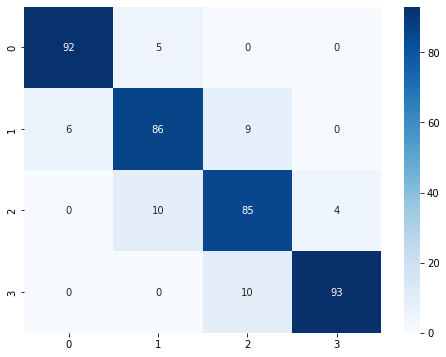

In [35]:
model=RandomForestClassifier(n_estimators=200,max_depth=10)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
rf_score=accuracy_score(y_test,y_pred)
print('accuracy score is : ',rf_score)
print(classification_report(y_test,y_pred))
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_pred),cmap='Blues',annot=True)
plt.show()

## Support vactior classifier(SVC)

In [36]:
x=data.drop('price_range',axis=1)
y=data['price_range']

In [37]:
def svc_best(x,y,test_size,gamma,C):
    eval_df=pd.DataFrame()
    for xx in test_size:
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=xx,random_state=10)
        for i in c:
            for j in gamma:

                model=SVC(C=i,gamma=j)
                model.fit(x_train,y_train)
                y_pred=model.predict(x_test)
                dict={"Test_size":xx, "C":i,"gamma":j, "Accuracy":accuracy_score(y_test, y_pred), "Score":model.score(x_test,y_test)}
                eval_df=eval_df.append(dict,ignore_index=True)
    return(eval_df)

                

In [38]:
c=range(1,11)
eval_df=svc_best(x,y,test_size=[.1,.15,.2,.25,.3],gamma=['auto','scale'],C=c)

In [39]:
eval_df

,Test_size,C,gamma,Accuracy,Score
0,0.1,1,auto,0.215000,0.215000
1,0.1,1,scale,0.925000,0.925000
2,0.1,2,auto,0.215000,0.215000
3,0.1,2,scale,0.940000,0.940000
4,0.1,3,auto,0.215000,0.215000
...,...,...,...,...,...
95,0.3,8,scale,0.966667,0.966667
96,0.3,9,auto,0.233333,0.233333
97,0.3,9,scale,0.961667,0.961667
98,0.3,10,auto,0.233333,0.233333


In [40]:
eval_df['Score'].max()

0.9666666666666667

In [41]:
eval_df[eval_df['Score']>0.96]

,Test_size,C,gamma,Accuracy,Score
93,0.3,7,scale,0.963333,0.963333
95,0.3,8,scale,0.966667,0.966667
97,0.3,9,scale,0.961667,0.961667
99,0.3,10,scale,0.961667,0.961667


accuracy score is :  0.965
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        92
           1       0.95      0.96      0.95        97
           2       0.95      0.94      0.95       109
           3       0.99      0.96      0.98       102

    accuracy                           0.96       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.96      0.96       400



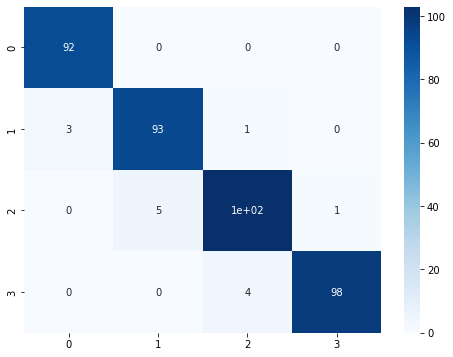

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
svc_model=SVC(C=8,gamma='scale',kernel='linear')
svc_model.fit(x_train,y_train)
y_pred=svc_model.predict(x_test)
svc_score=accuracy_score(y_test,y_pred)
print('accuracy score is : ',svc_score)
print(classification_report(y_test,y_pred))
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_pred),cmap='Blues',annot=True)
plt.show()


# Model performence comparison

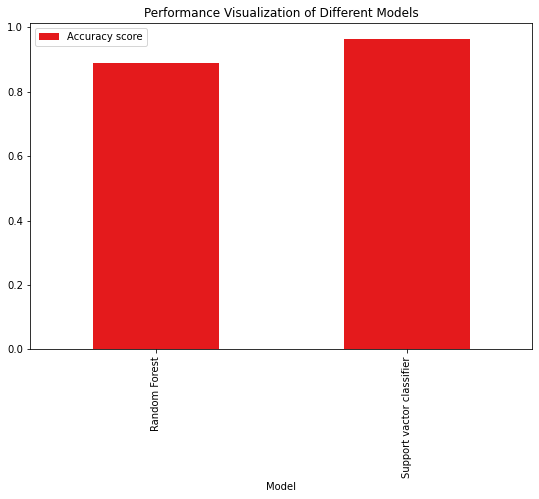

In [47]:
models=['Random Forest','Support vactor classifier']
accuracy_scores=[rf_score,svc_score]
df=pd.DataFrame({'Model':models,"Accuracy score":accuracy_scores})
df.plot(x="Model",y="Accuracy score", figsize=(9,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.show()

## prediction using Random Forest with testing data

In [48]:
data_test=data_test.drop('id',axis=1)


KeyError: "['id'] not found in axis"

In [ ]:
target=svc_model.predict(data_test)
target

In [ ]:
data_test['target']=target
data_test.head(10)